<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 0 Installment Extra Packages***

#####***Install Some Packages***

In [1]:
!pip install pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####***Import Basic Modules***

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import pandas as pd
import yfinance as yf
from scipy import stats

###***Chapter 1 Intro [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33)***

####***Section 1 Python Data Science Ecosystem***



<img src="https://yqintl.alicdn.com/f5fb28c5dd4c1571db53528b6ad21fe707fe7b8d.png">

Sorce [Mars – Matrix-based Universal Distributed Computing Framework](https://www.alibabacloud.com/blog/mars-matrix-based-universal-distributed-computing-framework_594606)

####***Section 2 Numpy Version***

In [ ]:
def main():
    print(np.__version__)
        
if __name__ == "__main__":
    main()

1.22.4


####***Section 3 Special Numbers***

#####***$\pi$***

In [ ]:
def main():
    print(f'{np.pi = }')
            
if __name__ == "__main__":
    main()

np.pi = 3.141592653589793


#####***$e$***

In [ ]:
def main():
    print(f'{np.e = }')
            
if __name__ == "__main__":
    main()

np.e = 2.718281828459045


#####***Plot of Sine and Cosine***

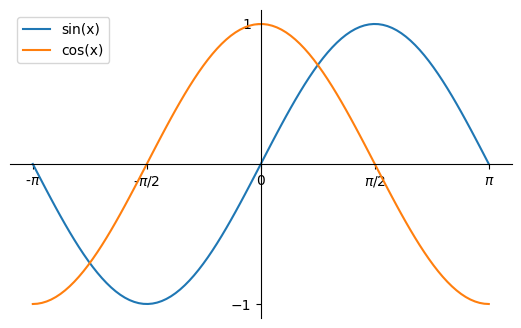

In [ ]:
def main():    
    x = np.linspace(-np.pi,np.pi,100)
    sin = np.sin(x)
    cos = np.cos(x)
    
    fig, ax = plt.subplots(figsize=(4*1.61803398875,4))
    
    ax.plot(x, sin, label='sin(x)')
    ax.plot(x, cos, label='cos(x)')
    
    ax.legend()
    
    ax.set_xticks( ( -np.pi, -np.pi/2, 0, np.pi/2, np.pi )  )
    ax.set_xticklabels( ( "-$\pi$", "-$\pi$/2", "0", "$\pi$/2", "$\pi$" ) )
    
    ax.set_yticks( ( -1, 1 )  )
    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    plt.show()
            
if __name__ == "__main__":
    main()

#####***np.nan***

In [ ]:
def main():
    x = np.array([
        [93., 84., 73., 68.],
        [97., 67., 57., np.nan],
        [87., 87., np.nan, 77.]
        ])
    print(x) 

if __name__ == "__main__":
    main()

[[93. 84. 73. 68.]
 [97. 67. 57. nan]
 [87. 87. nan 77.]]


####***Section 4 Numpy Array over List [eng](https://www.youtube.com/watch?v=rN0TREj8G7U&list=PLeo1K3hjS3uset9zIVzJWqplaWBiacTEU&index=1)***

#####***Save Coding Time***



$$
[1,2,3]+[4,5,6]=[5,7,9]
$$

In [ ]:
def main():
    a = [1,2,3]
    b = [4,5,6]

    # vector addition using for loop
    c = []
    for i in range(len(a)):
        c.append(a[i]+b[i])
    print(c)

if __name__ == "__main__":
    main()

[5, 7, 9]


In [ ]:
def main():
    a = [1,2,3]
    b = [4,5,6]

    # vector addition using list comprehension     
    c = [x + y for x, y in zip(a,b)]
    print(c)

if __name__ == "__main__":
    main()

[5, 7, 9]


In [ ]:
def main():
    a = [1,2,3]
    b = [4,5,6]

    a = np.array(a)
    b = np.array(b)

    # vector addition using numpy array    
    c = a + b
    print(c)

if __name__ == "__main__":
    main()

[5 7 9]


#####***Fast [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=1m30s)***

- Same Data Type

- Contiguous Memory

- SIMD Vector Processing

- Effective Cache Utilization



$$\sum_{k=1}^n k$$

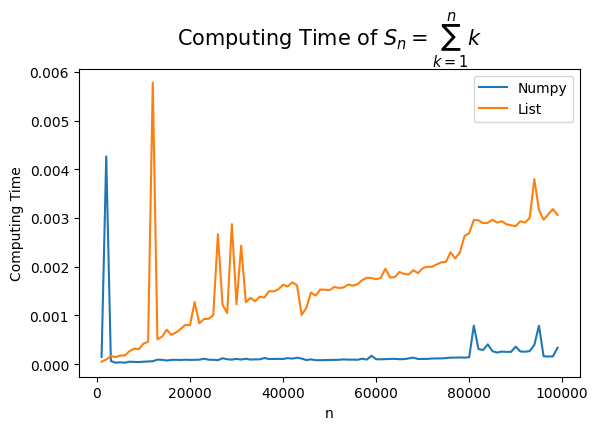

In [ ]:
import time

def main():
    time_numpy = []
    time_list = []

    for i in range(1_000,100_000,1_000):
        tic = time.time()
        np.sum( np.arange(i) )
        toc = time.time()
        time_numpy.append(toc-tic)
        
        tic = time.time()
        sum( list( range(i) ) )
        toc = time.time()
        time_list.append(toc-tic)
        
    fig, ax = plt.subplots(figsize=(4*1.61803398875,4))
    
    ax.set_title("Computing Time of $S_n=\sum_{k=1}^nk$", fontsize=15)
    ax.plot(range(1_000,100_000,1_000), time_numpy, label="Numpy")
    ax.plot(range(1_000,100_000,1_000), time_list, label="List")
    ax.set_xlabel('n')
    ax.set_ylabel('Computing Time')
    ax.legend()

    plt.show()
       
if __name__ == "__main__":
    main()

#####***Use Less Memory***



<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png">

Figure Source [Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)

###***Chapter 2 Numpy Array***

####***Section 1 What is Numpy Array [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=7m1s)***

$$\begin{array}{lll}
\text{0D Numpy Array}&=&\text{Number}\\
\text{1D Numpy Array}&=&\text{Vector}\\
\text{2D Numpy Array}&=&\text{Matrix}\\
\text{3D Numpy Array}&=&\text{Color Image}\\
\text{4D Numpy Array}&=&\text{Color Images}\\
\end{array}$$

####***Section 2 How to Make Numpy Array [eng](https://www.youtube.com/watch?v=TKoRXk_Wzog&list=PL9oKUrtC4VP6gDp1Vq3BzfViO0TWgR0vR&index=5)***

#####***Built-In Function - np.array [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=8m20s)***

In [ ]:
def main():
    a = np.array(21)
    print(f'{a = }',f'{type(a) = }',f'{a.ndim = }',f'{a.shape = }',sep="\n")
       
if __name__ == "__main__":
    main()

a = array(21)
type(a) = <class 'numpy.ndarray'>
a.ndim = 0
a.shape = ()


In [ ]:
def main():
    a = np.array([1, 2, 3])
    print(f'{a = }',f'{type(a) = }',f'{a.ndim = }',f'{a.shape = }',sep="\n")
       
if __name__ == "__main__":
    main()

a = array([1, 2, 3])
type(a) = <class 'numpy.ndarray'>
a.ndim = 1
a.shape = (3,)


In [ ]:
def main():    
    a = np.array([[1, 2, 3], [4, 5, 6]])
    print(f'{a = }',f'{type(a) = }',f'{a.ndim = }',f'{a.shape = }',sep="\n")
       
if __name__ == "__main__":
    main()

a = array([[1, 2, 3],
       [4, 5, 6]])
type(a) = <class 'numpy.ndarray'>
a.ndim = 2
a.shape = (2, 3)


In [ ]:
def main():    
    a = np.array([[[1, 2, 3], [4, 5, 6]],[[1, 4, 2], [5, 7, 3]]])
    print(f'{a = }',f'{type(a) = }',f'{a.ndim = }',f'{a.shape = }',sep="\n")
       
if __name__ == "__main__":
    main()

a = array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 4, 2],
        [5, 7, 3]]])
type(a) = <class 'numpy.ndarray'>
a.ndim = 3
a.shape = (2, 2, 3)


#####***Built-In Function - np.linspace [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=3h47m3s)***

In [ ]:
def main():
    a = np.linspace(-1, 2)
    print("np.linspace(-1, 2)")
    print(f'{a}', end="\n\n")
    
    a = np.linspace(-1, 2, 4)
    print("np.linspace(-1, 2, 4)")
    print(f'{a}', end="\n\n")
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.arange***

In [ ]:
def main():
    a = np.arange(9)
    print("np.arange(9)")
    print(f'{a}', end="\n\n")
    
    a = np.arange(1,9)
    print("np.arange(1,9)")
    print(f'{a}', end="\n\n")
    
    a = np.arange(1,9,2)
    print("np.arange(1,9,2)")
    print(f'{a}', end="\n\n")
       
if __name__ == "__main__":
    main()

#####***Built-In Function - np.zeros, np.ones, np.empty [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=3h56m2s)***

In [ ]:
def main():   
    a = np.zeros((1,2,3))
    print(a.shape, a.dtype)

    a = np.ones((1,2,3))
    print(a.shape, a.dtype)

    a = np.empty((1,2,3))
    print(a.shape, a.dtype)

if __name__ == "__main__":
    main()

(1, 2, 3) float64
(1, 2, 3) float64
(1, 2, 3) float64


#####***Built-In Function - np.zeros_like, np.ones_like, np.empty_like***

In [ ]:
def main(): 
    x = np.zeros((1,2,3)) 

    a = np.zeros_like(x)
    print(a.shape, a.dtype)

    a = np.ones_like(x)
    print(a.shape, a.dtype)

    a = np.empty_like(x)
    print(a.shape, a.dtype)

if __name__ == "__main__":
    main()

#####***Built-In Function - np.full***

In [ ]:
def main():    
    a = np.full((2,5), 7)
    print("np.full((2,5), 7)")
    print(f'{a}', end="\n\n")
        
if __name__ == "__main__":
    main()

np.full((2,5), 7)
[[7 7 7 7 7]
 [7 7 7 7 7]]



####***Section 3 Built-In Function - np.eye and np.identity***

#####***Built-In Function - np.eye***

In [ ]:
def main():
    a = np.eye(3)
    print("np.eye(3)")
    print(f'{a}', end="\n\n")
    
    a = np.eye(3, 5)
    print("np.eye(3, 5)")
    print(f'{a}', end="\n\n")
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.identity***

In [ ]:
def main():
    a = np.identity(3)
    print("np.identity(3)")
    print(f'{a}', end="\n\n")
    
    try:
        a = np.identity(3, 5)
    except TypeError as e:
        print(e)
        print("Don't use np.identity to make identity matrices.")
        
if __name__ == "__main__":
    main()

####***Section 4 Built-In Function - np.diag***

#####***Built-In Function - np.diag***

$$
\text{diagonal components}
\quad\stackrel{\text{np.diag}}{\longleftrightarrow}\quad
\text{diagonal matrix}
$$

#####***from Diagonal Components to Diagonal Matrix***

In [ ]:
def main():
    a = np.diag([1,2,3])
    print("np.diag([1,2,3])")
    print(f'{a}', end="\n\n")

        
if __name__ == "__main__":
    main()

#####***Keyword - k***

In [ ]:
def main():
    a = np.diag([1,2,3])
    print("np.diag([1,2,3])")
    print(f'{a}', end="\n\n")
    
    a = np.diag([1,2,3], k=1)
    print("np.diag([1,2,3], k=1)")
    print(f'{a}', end="\n\n")
    
    a = np.diag([1,2,3], k=2)
    print("np.diag([1,2,3], k=2)")
    print(f'{a}', end="\n\n")
    
    a = np.diag([1,2,3], k=-1)
    print("np.diag([1,2,3], k=-1)")
    print(f'{a}', end="\n\n")
    
    a = np.diag([1,2,3], k=-2)
    print("np.diag([1,2,3], k=-2)")
    print(f'{a}', end="\n\n")
       
if __name__ == "__main__":
    main()

np.diag([1,2,3])
[[1 0 0]
 [0 2 0]
 [0 0 3]]

np.diag([1,2,3], k=1)
[[0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]
 [0 0 0 0]]

np.diag([1,2,3], k=2)
[[0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 3]
 [0 0 0 0 0]
 [0 0 0 0 0]]

np.diag([1,2,3], k=-1)
[[0 0 0 0]
 [1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]]

np.diag([1,2,3], k=-2)
[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]]



#####***from Diagonal Matrix to Diagonal Components***

In [ ]:
def main():
    A = np.array([[1, 4, 0],
                  [0, 2, 5],
                  [0, 0, 3]])
    
    print(f'{np.diag(A) = }')
    print(f'{np.diag(A, k=1) = }')
    print(f'{np.diag(A, k=-1) = }')
       
if __name__ == "__main__":
    main()

np.diag(A) = array([1, 2, 3])
np.diag(A, k=1) = array([4, 5])
np.diag(A, k=-1) = array([0, 0])


#####***Geometry of Diagonal Matrix***

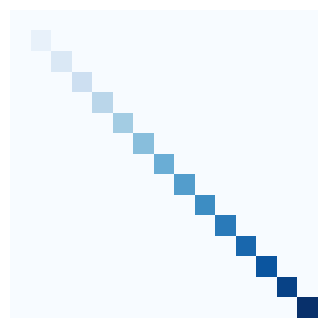

In [ ]:
def main():
    a = np.diag(range(15))
    
    fig, ax = plt.subplots(figsize=(4,4))    
    ax.imshow(a, cmap='Blues')
    ax.axis('off')
    plt.show()
    
if __name__ == "__main__":
    main()

###***Chapter 3 Random Numpy Array [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h2m32s)***

####***Section 1 Random Number Seed***

#####***Built-In Function - np.random.seed [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)***

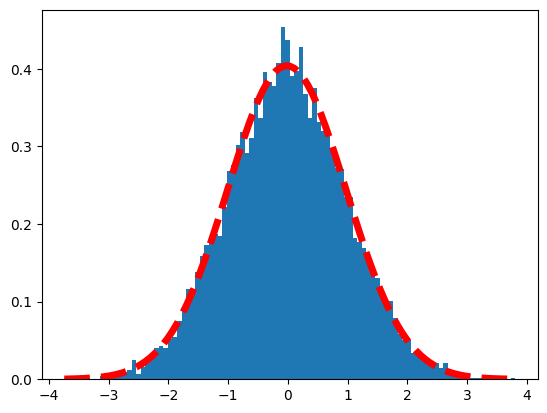

In [ ]:
def main():
    np.random.seed(0)

    n_smaples = 10_000

    data = np.random.randn(n_smaples)

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 Distributions related to Normal Distribution***

#####***Built-In Function - np.random.randn [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h13m3s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)***

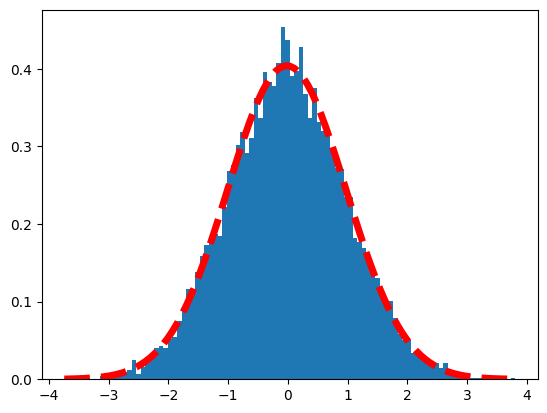

In [ ]:
def main():
    np.random.seed(0)

    n_smaples = 10_000

    data = np.random.randn(n_smaples)

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.normal [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h52m8s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)***

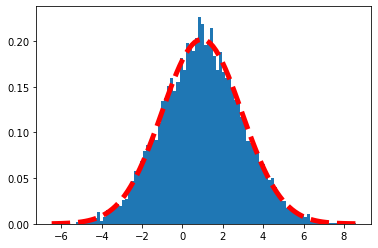

In [ ]:
def main():
    np.random.seed(0)

    loc = 1
    scale = 2
    n_smaples = 10_000

    data = np.random.normal( loc=loc, scale=scale, size=(n_smaples,) )

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.standard_normal [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html)***

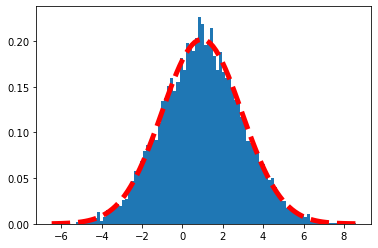

In [ ]:
def main():
    np.random.seed(0)

    n_smaples = 10_000

    data = np.random.standard_normal( size=(n_smaples,) )

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.norm(loc=mu,scale=sigma).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.multivariate_normal [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=5h37m57s)***

x.shape = (10000, 2)


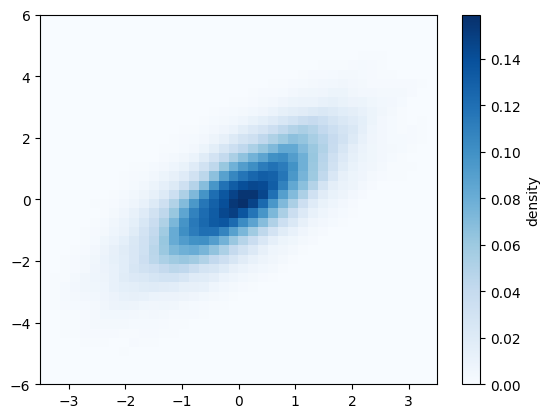

In [ ]:
def main():
    mean = [0, 0]
    cov = [[1, 1], [1, 2]]
    x = np.random.multivariate_normal(mean, cov, 10000)
    print(f"{x.shape = }")

    kde = stats.gaussian_kde(x.T)

    # evaluate on a regular grid
    x_ = np.linspace(-3.5, 3.5, 40) # (40,)
    y_ = np.linspace(-6, 6, 40)     # (40,)
    X, Y = np.meshgrid(x_, y_)      # (40, 40)
    XY = np.vstack([X.ravel(), Y.ravel()]) # (2, 1600)

    Z = kde.evaluate(XY).reshape(X.shape) # (40, 40)

    fig, ax = plt.subplots()
    a = ax.imshow(Z,
                  origin='lower', 
                  aspect='auto',
                  extent=[-3.5, 3.5, -6, 6],
                  cmap='Blues')
    plt.colorbar(a, label="density")
    plt.show()
    
if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.chisquare [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=5h45m51s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html)***

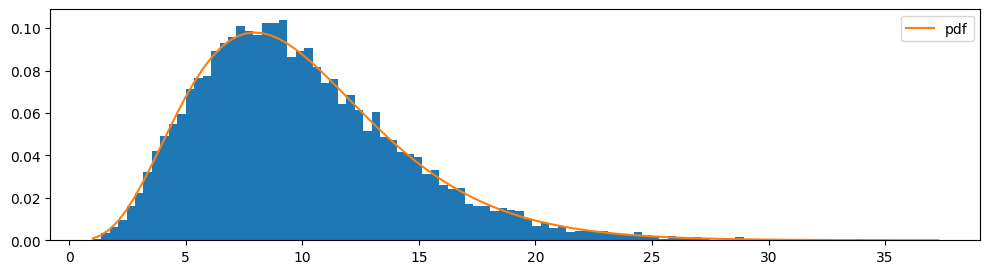

In [ ]:
def main():
    np.random.seed(0)

    df = 10
    n_smaples = 10_000

    data = np.random.chisquare( df=df, size=(n_smaples,) )

    fig, ax = plt.subplots(figsize=(12,3))

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    mu = data.mean()
    sigma = data.std()
    pdf_at_bins_ = stats.chi2(mu).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, label='pdf')

    ax.legend()
    
    plt.show()

if __name__ == "__main__":
    main()

####***Section 3 Uniform Distribution***

#####***Built-In Function - np.random.rand [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h8m16s)***




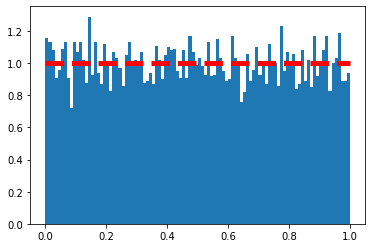

In [ ]:
def main():
    np.random.seed(0)

    n_smaples = 10_000

    data = np.random.rand(n_smaples)

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    low_ = data.min()
    high_ = data.max()
    pdf_at_bins_ = stats.uniform(loc=low_,scale=high_-low_).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.uniform [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=5h8m41s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)***

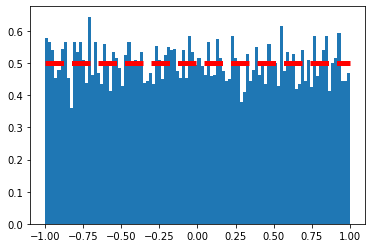

In [ ]:
def main():
    np.random.seed(0)

    low = -1
    high = 1
    n_smaples = 10_000

    data = np.random.uniform( low=low, high=high, size=(n_smaples,) )

    fig, ax = plt.subplots()

    _, bins_, _ = ax.hist(data,bins=100,density=True)

    low_ = data.min()
    high_ = data.max()
    pdf_at_bins_ = stats.uniform(loc=low_,scale=high_-low_).pdf(bins_)
    ax.plot(bins_, pdf_at_bins_, '--r', linewidth=5)

    plt.show()

if __name__ == "__main__":
    main()

####***Section 4 Distributions related to Coin Flip***

#####***Built-In Function - np.random.binomial [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h59m6s)***

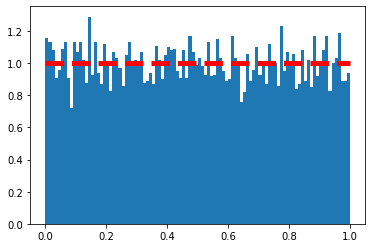

In [ ]:
def main():
    n = 10
    p = 0.5
    data = np.random.binomial(n, p, size=(1000,))

    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.set_title("Histogram of Binomial Samples", fontsize=15)
    bins = np.arange(n+2) - 0.5
    ax.hist(data, bins=bins, density=True, alpha=0.4)
    ax.set_xticks(np.arange(n+1))
    
    x = np.arange(n+1) 
    p = stats.binom(n, p).pmf(x)
    for x_loc, p_loc in zip(x, p):
        ax.plot((x_loc-0.5,x_loc+0.5), (p_loc,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc-0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc+0.5,x_loc+0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc+0.5), (0,0), color='red', alpha=0.9, linestyle='--')
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.geometric***

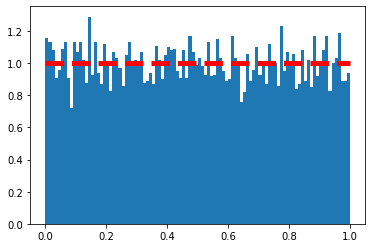

In [ ]:
def main():
    p = 0.5
    data = np.random.geometric(p, size=(1000,))

    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.set_title("Histogram of Geometric Samples", fontsize=15)
    bins = np.arange(10) - 0.5
    ax.hist(data, bins=bins, density=True)
    ax.set_xticks(np.arange(10))
    
    x = np.arange(9)
    p = stats.geom(p).pmf(x)
    for x_loc, p_loc in zip(x, p):
        ax.plot((x_loc-0.5,x_loc+0.5), (p_loc,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc-0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc+0.5,x_loc+0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc+0.5), (0,0), color='red', alpha=0.9, linestyle='--')
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.poisson [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=5h15m54s)***

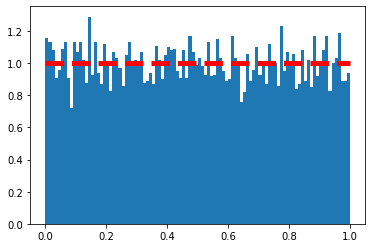

In [ ]:
def main():
    la = 10
    data = np.random.poisson(la, size=(1000,))

    fig, ax = plt.subplots(figsize=(10, 4))    
    
    ax.set_title("Histogram of Poisson Samples", fontsize=15)
    bins = np.arange(30) - 0.5
    ax.hist(data, bins=bins, density=True)
    ax.set_xticks(np.arange(30))
    
    x = np.arange(29)
    p = stats.poisson(la).pmf(x)
    for x_loc, p_loc in zip(x, p):
        ax.plot((x_loc-0.5,x_loc+0.5), (p_loc,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc-0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc+0.5,x_loc+0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc+0.5), (0,0), color='red', alpha=0.9, linestyle='--')
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.exponential [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=5h24m0s)***

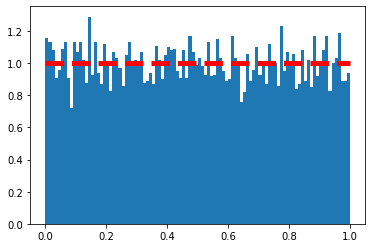

In [ ]:
def main():
    bt = 1/10 # bt = 1/la
    data = np.random.exponential(bt, size=(1000,))

    fig, ax = plt.subplots()
    
    ax.set_title("Histogram of Exponential Samples", fontsize=15)
    _, bins, _ = ax.hist(data, bins=100, density=True)
    ax.plot(bins, stats.expon(scale=bt).pdf(bins), color='red', linestyle='--', alpha=0.9)
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

####***Section 5 General Discrete Distribution***

#####***Built-In Function - np.random.choice***

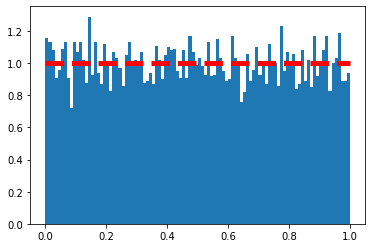

In [ ]:
def main():
    data_points = [ -3,  -1,   1,   2,   5]
    pmf = [0.1, 0.1, 0.1, 0.5, 0.2]
    size = (100,)
    data = np.random.choice(data_points, p=pmf, size=size) 

    fig, ax = plt.subplots(figsize=(10, 4))
    
    ax.set_title("Histogram of Choice Samples", fontsize=15)
    bins = np.arange(min(data_points), max(data_points)+2) - 0.5
    ax.hist(data, bins=bins, density=True, alpha=0.4)
    ax.set_xticks(np.arange(min(data_points), max(data_points)+1))
    
    for x_loc, p_loc in zip(data_points, pmf):
        ax.plot((x_loc-0.5,x_loc+0.5), (p_loc,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc-0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc+0.5,x_loc+0.5), (0,p_loc), color='red', alpha=0.9, linestyle='--')
        ax.plot((x_loc-0.5,x_loc+0.5), (0,0), color='red', alpha=0.9, linestyle='--')
        
    plt.show()
        
        
if __name__ == "__main__":
    main()

#####***Built-In Function - np.random.randint [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h20m50s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)***

```random.randint(low, high=None, size=None, dtype=int)```

Return random integers from low (inclusive) to high (exclusive).

[doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html)

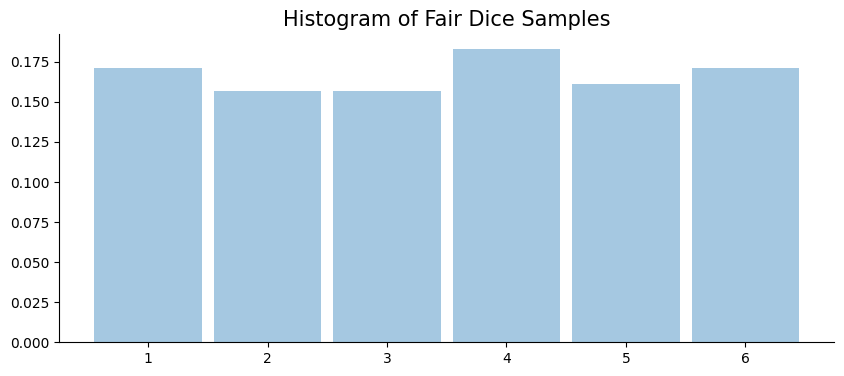

In [ ]:
def main():
    np.random.seed(0)
    data = np.random.randint(low=1, high=7, size=(1_000,))

    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_title("Histogram of Fair Dice Samples", fontsize=15)
    bins = np.arange(1, 8) - 0.5
    ax.hist(data, bins=bins, density=True, alpha=0.4, rwidth=0.9)
    ax.set_xticks(np.arange(1, 7)) 
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False)   
    plt.show()
        
        
if __name__ == "__main__":
    main()

####***Section 6 Random Permutation***

#####***Built-In Function - np.random.shuffle [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h36m49s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)***

In [ ]:
def main():
    x = [1, 4, 9, 12, 15]
    print(np.random.shuffle(x)) # inplace shuffle ---> returns None
        
if __name__ == "__main__":
    main()

None


In [ ]:
def main():
    x = [1, 4, 9, 12, 15]
    np.random.shuffle(x) # inplace shuffle
    print(x)
        
if __name__ == "__main__":
    main()

[15, 9, 4, 1, 12]


In [ ]:
def main():
    x = np.array([1, 4, 9, 12, 15])
    np.random.shuffle(x) # inplace shuffle
    print(x)
        
if __name__ == "__main__":
    main()

[ 1  4  9 15 12]


In [ ]:
def main():
    x = np.arange(9).reshape((3, 3))
    np.random.shuffle(x) # inplace shuffle
    print(x)
        
if __name__ == "__main__":
    main()

[[6 7 8]
 [3 4 5]
 [0 1 2]]


#####***Built-In Function - np.random.permutation [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=4h40m0s) [doc](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html)***

In [ ]:
def main():
    x = np.random.permutation(10)
    print(x)
        
if __name__ == "__main__":
    main()

[3 1 8 7 9 0 6 4 2 5]


In [ ]:
def main():
    x = [1, 4, 9, 12, 15]
    x = np.random.permutation(x)
    print(x)
        
if __name__ == "__main__":
    main()

[ 9 12 15  4  1]


In [ ]:
def main():
    x = np.array([1, 4, 9, 12, 15])
    x = np.random.permutation(x)
    print(x)
        
if __name__ == "__main__":
    main()

[ 9 15  4 12  1]


In [ ]:
def main():
    x = np.arange(9).reshape((3, 3))
    x = np.random.permutation(x)
    print(x)
        
if __name__ == "__main__":
    main()

[[3 4 5]
 [6 7 8]
 [0 1 2]]


###***Chapter 4 Numpy Array Attribute***

####***Section 1 Attribute - shape and ndim [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h21m21s)***

#####***Attribute - shape***



<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png" width=50%>

Figure Sorce [Tips About Numpy Arrays](https://predictivehacks.com/tips-about-numpy-arrays/)

In [ ]:
def main():
    x = np.array([7,2,9,10])
    print(f"{x.shape = }")

    y = np.array([[5.2,3.0,4.5],[9.1,0.1,0.3]])
    print(f"{y.shape = }")

    z = np.zeros((4,3,2))
    print(f"{z.shape = }")

if __name__ == "__main__":
    main()

x.shape = (4,)
y.shape = (2, 3)
z.shape = (4, 3, 2)


In [ ]:
def main():
    x = np.array([7,2,9,10])
    print(f"{x.ndim = }")

    y = np.array([[5.2,3.0,4.5],[9.1,0.1,0.3]])
    print(f"{y.ndim = }")

    z = np.zeros((4,3,2))
    print(f"{z.ndim = }")

if __name__ == "__main__":
    main()

x.ndim = 1
y.ndim = 2
z.ndim = 3


####***Section 2 Image Shape***

#####***Image Starry Night Shape - (1198, 1513, 3)***

type(img) = <class 'numpy.ndarray'>, img.shape = (1198, 1513, 3), img.dtype = dtype('uint8')


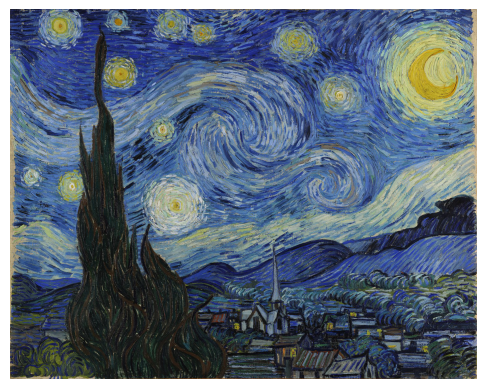

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1513px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg?20121101035929"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    print(f"{type(img) = }, {img.shape = }, {img.dtype = }")

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')

if __name__ == "__main__":
    main()

#####***Image Mewtwo Shape - (227, 185, 4)***

type(img) = <class 'numpy.ndarray'>, img.shape = (227, 185, 4), img.dtype = dtype('uint8')


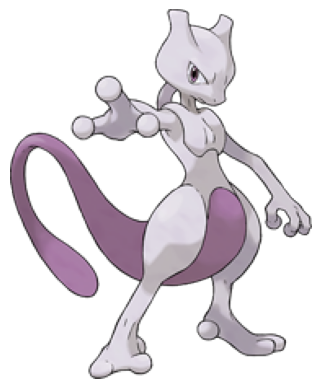

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    print(f"{type(img) = }, {img.shape = }, {img.dtype = }")

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')

if __name__ == "__main__":
    main()

####***Section 3 How to Change Shape [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h28m57s)***

#####***Method - reshape***

In [ ]:
def main():
    x = np.arange(6)
    print(f"{x.shape = }")
    print(x,end="\n\n")

    y = x.reshape( ( 3, 2 ) )
    print(f"{y.shape = }")
    print(y)
       
if __name__ == "__main__":
    main()

x.shape = (6,)
[0 1 2 3 4 5]

y.shape = (3, 2)
[[0 1]
 [2 3]
 [4 5]]


#####***Function - np.reshape***

In [ ]:
def main():
    x = np.arange(6)
    print(f"{x.shape = }")
    print(x,end="\n\n")

    y = np.reshape(x, (3,2))
    print(f"{y.shape = }")
    print(y)
       
if __name__ == "__main__":
    main()

#####***What is -1***

In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    y = x.reshape( ( -1, ) )
    z = x.reshape( ( 2, -1 ) )
    w = x.reshape( ( -1, 4 ) )
    print(x.shape)
    print(y.shape)
    print(z.shape)
    print(w.shape)
    
    
if __name__ == "__main__":
    main()

####***Section 4 How to Change Shape - Expanding Dims***

#####***Function - np.expand_dims***

In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    print(f"{x.shape = }", end="\n\n")
    
    y0 = np.expand_dims(x, axis=0) 
    y1 = np.expand_dims(x, axis=1)
    y2 = np.expand_dims(x, axis=2)
    y3 = np.expand_dims(x, axis=3)
    print(f"{y0.shape = }")
    print(f"{y1.shape = }")
    print(f"{y2.shape = }")
    print(f"{y3.shape = }")
        
if __name__ == "__main__":
    main()

x.shape = (2, 3, 4)

y0.shape = (1, 2, 3, 4)
y1.shape = (2, 1, 3, 4)
y2.shape = (2, 3, 1, 4)
y3.shape = (2, 3, 4, 1)


#####***What is np.newaxis When Expanding***

In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    print(f"{x.shape = }", end="\n\n")
    
    y1 = x[np.newaxis,:]
    y2 = x[:,np.newaxis]
    y3 = x[:,:,np.newaxis]
    y4 = x[:,:,:,np.newaxis]
    print(f"{y1.shape = }")
    print(f"{y2.shape = }")
    print(f"{y3.shape = }")
    print(f"{y4.shape = }", end='\n\n')  
    
if __name__ == "__main__":
    main()

x.shape = (2, 3, 4)

y1.shape = (1, 2, 3, 4)
y2.shape = (2, 1, 3, 4)
y3.shape = (2, 3, 1, 4)
y4.shape = (2, 3, 4, 1)



In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    print(f"{x.shape = }", end="\n\n")
    
    z1 = x[np.newaxis,...]
    z2 = x[...,np.newaxis]
    print(f"{z1.shape = }")
    print(f"{z2.shape = }")   
    
if __name__ == "__main__":
    main()

x.shape = (2, 3, 4)

z1.shape = (1, 2, 3, 4)
z2.shape = (2, 3, 4, 1)


#####***What is None When Expanding***

In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    print(f"{x.shape = }", end="\n\n")
    
    y1 = x[None,:]
    y2 = x[:,None]
    y3 = x[:,:,None]
    y4 = x[:,:,:,None]
    print(f"{y1.shape = }")
    print(f"{y2.shape = }")
    print(f"{y3.shape = }")
    print(f"{y4.shape = }", end='\n\n')
       
if __name__ == "__main__":
    main()

x.shape = (2, 3, 4)

y1.shape = (1, 2, 3, 4)
y2.shape = (2, 1, 3, 4)
y3.shape = (2, 3, 1, 4)
y4.shape = (2, 3, 4, 1)



In [ ]:
def main():
    x = np.zeros((2, 3, 4))
    print(f"{x.shape = }", end="\n\n")
    
    z1 = x[None,...]
    z2 = x[...,None]
    print(f"{z1.shape = }")
    print(f"{z2.shape = }")
       
if __name__ == "__main__":
    main()

x.shape = (2, 3, 4)

z1.shape = (1, 2, 3, 4)
z2.shape = (2, 3, 4, 1)


####***Section 5 How to Change Shape - Squeezing Dims***

#####***Function - np.squeeze***

In [ ]:
def main():
    x = np.random.normal(size=(1,3,1,2,1,5,1))
    y = np.squeeze(x)
    print(f"{x.shape = }")
    print(f"{y.shape = }")    
    
if __name__ == "__main__":
    main()

x.shape = (1, 3, 1, 2, 1, 5, 1)
y.shape = (3, 2, 5)


####***Section 6 Attribute - dtype [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=57m10s)***

#####***Attribute - dtype***

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [ ]:
def main():
    x = np.array([1, 2, 3])
    y = np.array([1, 2, 3], dtype='uint8')
    z = np.array([1, 2, 3], dtype='float32')
    print(x.dtype, y.dtype, z.dtype, sep="\n")

if __name__ == "__main__":
    main()

#####***Dtype of np.zeros and np.ones are np.float64***

In [ ]:
def main():
    a = np.zeros((2,3))
    b = np.ones((2,3))
    print(f"{a.dtype = }")
    print(f"{b.dtype = }")
        
if __name__ == "__main__":
    main()

a.dtype = dtype('float64')
b.dtype = dtype('float64')


#####***MNIST Dtype is Uint8***

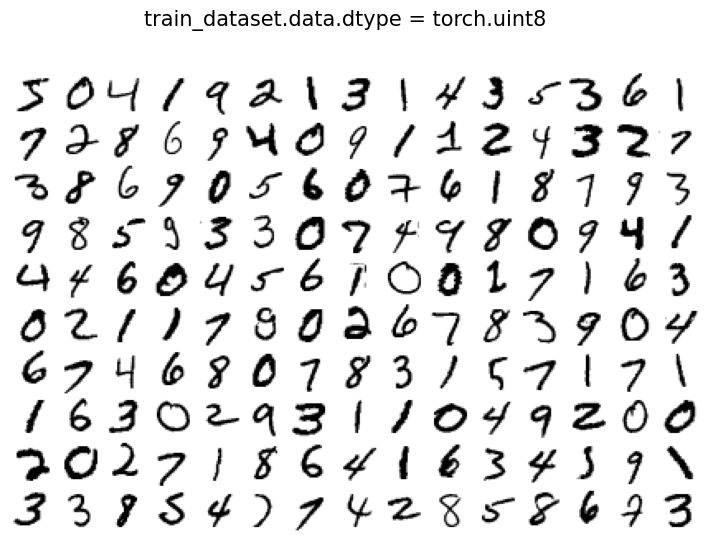

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

def main():
    train_dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
    test_dataset = MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=True)
    
    fig, ax = plt.subplots(figsize=(9,6))
    
    fig.suptitle(f'{train_dataset.data.dtype = }', fontsize=15)
    
    img = np.empty((28*10,28*15))
    for i in range(10):
        for j in range(15):
            img[i*28:(i+1)*28, j*28:(j+1)*28] = train_dataset.data[i*15+j] 
    ax.imshow(img, cmap='binary')
    ax.axis('off')
        
    plt.show()
           
if __name__ == "__main__":
    main()

####***Section 7 How to Change Dtype***

#####***Method - astype [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h6m41s)***

In [ ]:
def main():
    x = np.zeros((2,3))
    y = x.astype(np.uint8)
    print(x.dtype, y.dtype)

if __name__ == "__main__":
    main()

float64 uint8


#####***np.array Keyword - dtype***

In [ ]:
def main():
    x = np.array([1, 2, 3])
    print(x.dtype, end="\n\n")

    x =  np.array([1, 2, 3], dtype=np.uint8)  
    print(x.dtype, end="\n\n")

    x = np.array([1, 2, 3], dtype=np.float32)
    print(x.dtype, end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Change Everything - OK***

In [ ]:
def main():
    a = np.zeros(shape=(3,), dtype=np.uint8)
    b = np.array([-0.87796192, -0.97481932, -1.8001195]).astype(np.float64)
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    a = b
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Change Part with Same Dtype - OK***

In [ ]:
def main():
    a = np.zeros(shape=(2,3), dtype=np.uint8).astype(np.float64)
    b = np.array([-0.87796192, -0.97481932, -1.8001195]).astype(np.float64)
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    a[0,:] = b
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Change Part with Different Dtype - Not OK***

In [ ]:
def main():
    a = np.zeros(shape=(2,3), dtype=np.uint8)
    b = np.array([-0.87796192, -0.97481932, -1.8001195]).astype(np.float64)
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    a[0,:] = b
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    print( f"{np.uint8( -0.87796192 ) = }" )
    print( f"{np.uint8( -0.97481932 ) = }" )
    print( f"{np.uint8( -1.8001195 ) = }" )
    
if __name__ == "__main__":
    main()

a = array([[0, 0, 0],
       [0, 0, 0]], dtype=uint8)
b = array([-0.87796192, -0.97481932, -1.8001195 ])

a = array([[  0,   0, 255],
       [  0,   0,   0]], dtype=uint8)
b = array([-0.87796192, -0.97481932, -1.8001195 ])

np.uint8( -0.87796192 ) = 0
np.uint8( -0.97481932 ) = 0
np.uint8( -1.8001195 ) = 255


###***Chapter 5 Numpy Array Methods and Functions***

####***Section 1 Simple Methods***

#####***Method - min***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.min() = }")
    print(f"{a.min(axis=0) = }")
    print(f"{a.min(axis=1) = }")
    
if __name__ == "__main__":
    main()

a
[[5 2]
 [3 5]
 [2 3]]

a.min() = 2
a.min(axis=0) = array([2, 2])
a.min(axis=1) = array([2, 3, 2])


#####***Function - np.min***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")

    print(f"{np.min(a) = }")
    print(f"{np.min(a, axis=0) = }")
    print(f"{np.min(a, axis=1) = }")

    
    
if __name__ == "__main__":
    main()

a
[[5 2]
 [3 5]
 [2 3]]

np.min(a) = 2
np.min(a, axis=0) = array([2, 2])
np.min(a, axis=1) = array([2, 3, 2])


#####***Method - argmin***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.argmin() = }")
    print(f"{a.argmin(axis=0) = }")
    print(f"{a.argmin(axis=1) = }")
        
if __name__ == "__main__":
    main()

a
[[5 2]
 [3 5]
 [2 3]]

a.argmin() = 1
a.argmin(axis=0) = array([2, 0])
a.argmin(axis=1) = array([1, 0, 0])


#####***Function - np.argmin***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{np.argmin(a) = }")
    print(f"{np.argmin(a, axis=0) = }")
    print(f"{np.argmin(a, axis=1) = }")
        
if __name__ == "__main__":
    main()

#####***Method - max***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.max() = }")
    print(f"{a.max(axis=0) = }")
    print(f"{a.max(axis=1) = }")
 
if __name__ == "__main__":
    main()

#####***Function - np.max***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")

    print(f"{np.max(a) = }")
    print(f"{np.max(a, axis=0) = }")
    print(f"{np.max(a, axis=1) = }")  
    
if __name__ == "__main__":
    main()

#####***Method - argmax***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.argmax() = }")
    print(f"{a.argmax(axis=0) = }")
    print(f"{a.argmax(axis=1) = }")
      
if __name__ == "__main__":
    main()

a
[[5 2]
 [3 5]
 [2 3]]

a.argmax() = 0
a.argmax(axis=0) = array([0, 1])
a.argmax(axis=1) = array([0, 1, 1])


#####***Function - np.argmax***

In [ ]:
def main():
    a = np.array([[5,2],[3,5],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{np.argmax(a) = }")
    print(f"{np.argmax(a, axis=0) = }")
    print(f"{np.argmax(a, axis=1) = }")
      
if __name__ == "__main__":
    main()

#####***Function - np.minimum***

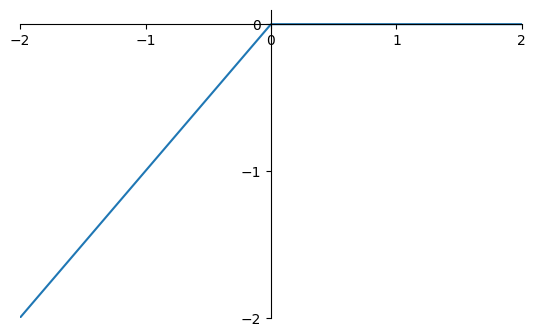

In [ ]:
def main():
    a = np.linspace(-2,2,10+1)
    b = np.zeros_like(a)
    c = np.minimum(a,b)

    fig, ax = plt.subplots(figsize=(4*1.61803398875,4))
    
    ax.plot(a, c)
    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position( "zero" )
    ax.spines['bottom'].set_position( "zero" )

    # Eliminate upper and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xticks( ( -2, -1, 0, 1, 2 ) )
    ax.set_yticks( ( 0, -1, -2 ) )
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 0.1)
    
    plt.show()
   
if __name__ == "__main__":
    main()

#####***Function - np.maximum***

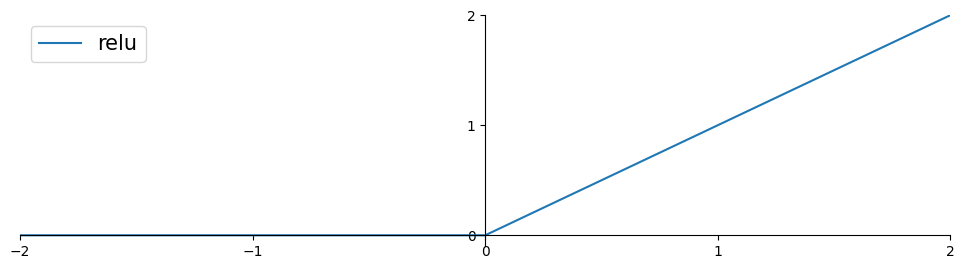

In [ ]:
def main():
    a = np.linspace(-2,2,10+1)
    b = np.zeros_like(a)
    c = np.maximum(a,b)

    fig, ax = plt.subplots(figsize=(12,3))
    
    ax.plot(a, c, label='relu')
    ax.legend(fontsize=15)
    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position( "zero" )
    ax.spines['bottom'].set_position( "zero" )

    # Eliminate upper and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xticks( ( -2, -1, 0, 1, 2 ) )
    ax.set_yticks( ( 0, 1, 2 ) )
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-0.1, 2)

    plt.show()
   
if __name__ == "__main__":
    main()

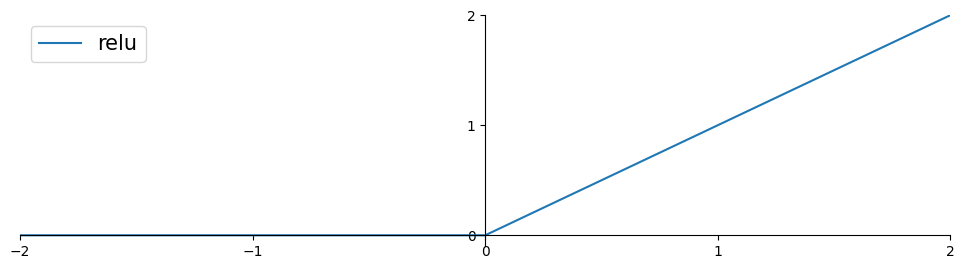

In [ ]:
# broadcasting
def main():
    a = np.linspace(-2,2,10+1) # broadcasting
    b = 0 # broadcasting
    c = np.maximum(a,b) # broadcasting

    fig, ax = plt.subplots(figsize=(12,3))
    
    ax.plot(a, c, label='relu')
    ax.legend(fontsize=15)
    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position( "zero" )
    ax.spines['bottom'].set_position( "zero" )

    # Eliminate upper and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xticks( ( -2, -1, 0, 1, 2 ) )
    ax.set_yticks( ( 0, 1, 2 ) )
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-0.1, 2)

    plt.show()
   
if __name__ == "__main__":
    main()

#####***Method - sum***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.sum() = }")
    print(f"{a.sum(axis=0) = }")
    print(f"{a.sum(axis=1) = }")
 
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

a.sum() = 12
a.sum(axis=0) = array([6, 6])
a.sum(axis=1) = array([3, 4, 5])


#####***Function - np.sum***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")

    print(f"{np.sum(a) = }")
    print(f"{np.sum(a, axis=0) = }")
    print(f"{np.sum(a, axis=1) = }")   
    
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

np.sum(a) = 12
np.sum(a, axis=0) = array([6, 6])
np.sum(a, axis=1) = array([3, 4, 5])


#####***Method - cumsum***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"a.cumsum()")
    print(f"{a.cumsum()}", end="\n\n")

    print(f"a.cumsum(axis=0)") 
    print(f"{a.cumsum(axis=0)}", end="\n\n")

    print(f"a.cumsum(axis=1)")
    print(f"{a.cumsum(axis=1)}", end="\n\n")
 
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

a.cumsum()
[ 1  3  6  7  9 12]

a.cumsum(axis=0)
[[1 2]
 [4 3]
 [6 6]]

a.cumsum(axis=1)
[[1 3]
 [3 4]
 [2 5]]



#####***Function - np.cumsum***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"np.cumsum(a)")
    print(f"{np.cumsum(a)}", end="\n\n")

    print(f"np.cumsum(a, axis=0)") 
    print(f"{np.cumsum(a, axis=0)}", end="\n\n")

    print(f"np.cumsum(a, axis=1)")
    print(f"{np.cumsum(a, axis=1)}", end="\n\n") 
    
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

np.cumsum(a)
[ 1  3  6  7  9 12]

np.cumsum(a, axis=0)
[[1 2]
 [4 3]
 [6 6]]

np.cumsum(a, axis=1)
[[1 3]
 [3 4]
 [2 5]]



#####***Method - prod***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.prod() = }")
    print(f"{a.prod(axis=0) = }")
    print(f"{a.prod(axis=1) = }")
 
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

a.prod() = 36
a.prod(axis=0) = array([6, 6])
a.prod(axis=1) = array([2, 3, 6])


#####***Function - np.prod***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")

    print(f"{np.prod(a) = }")
    print(f"{np.prod(a, axis=0) = }")
    print(f"{np.prod(a, axis=1) = }")   
    
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

np.prod(a) = 36
np.prod(a, axis=0) = array([6, 6])
np.prod(a, axis=1) = array([2, 3, 6])


#####***Method - cumprod***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"a.cumprod()")
    print(f"{a.cumprod()}", end="\n\n")

    print(f"a.cumprod(axis=0)") 
    print(f"{a.cumprod(axis=0)}", end="\n\n")

    print(f"a.cumprod(axis=1)")
    print(f"{a.cumprod(axis=1)}", end="\n\n")
 
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

a.cumprod()
[ 1  2  6  6 12 36]

a.cumprod(axis=0)
[[1 2]
 [3 2]
 [6 6]]

a.cumprod(axis=1)
[[1 2]
 [3 3]
 [2 6]]



#####***Function - np.cumprod***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"np.cumprod(a)")
    print(f"{np.cumprod(a)}", end="\n\n")

    print(f"np.cumprod(a, axis=0)") 
    print(f"{np.cumprod(a, axis=0)}", end="\n\n")

    print(f"np.cumprod(a, axis=1)")
    print(f"{np.cumprod(a, axis=1)}", end="\n\n") 
    
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

np.cumprod(a)
[ 1  2  6  6 12 36]

np.cumprod(a, axis=0)
[[1 2]
 [3 2]
 [6 6]]

np.cumprod(a, axis=1)
[[1 2]
 [3 3]
 [2 6]]



####***Section 2 Statistics Methods [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=3h35m45s)***

#####***Method - mean***

In [ ]:
def main():
    a = np.random.standard_normal( (2, 3) )
    print(f"{a.mean().shape = }")
    print(f"{a.mean(axis=0).shape = }") 
    print(f"{a.mean(axis=1).shape = }")
 
if __name__ == "__main__":
    main()

a.mean().shape = ()
a.mean(axis=0).shape = (3,)
a.mean(axis=1).shape = (2,)


#####***Function - np.mean***

In [ ]:
def main():
    a = np.random.standard_normal( (2, 3) )
    print(f"{np.mean(a).shape = }")
    print(f"{np.mean(a, axis=0).shape = }") 
    print(f"{np.mean(a, axis=1).shape = }")
 
if __name__ == "__main__":
    main()

np.mean(a).shape = ()
np.mean(a, axis=0).shape = (3,)
np.mean(a, axis=1).shape = (2,)


#####***Method - std***

In [ ]:
def main():
    a = np.random.standard_normal( (2, 3) )
    print(f"{a.std().shape = }")
    print(f"{a.std(axis=0).shape = }") 
    print(f"{a.std(axis=1).shape = }")
 
if __name__ == "__main__":
    main()

a.std().shape = ()
a.std(axis=0).shape = (3,)
a.std(axis=1).shape = (2,)


#####***Function - np.std***

In [ ]:
def main():
    a = np.random.standard_normal( (2, 3) )
    print(f"{np.std(a).shape = }")
    print(f"{np.std(a, axis=0).shape = }") 
    print(f"{np.std(a, axis=1).shape = }")
 
if __name__ == "__main__":
    main()

np.std(a).shape = ()
np.std(a, axis=0).shape = (3,)
np.std(a, axis=1).shape = (2,)


#####***Method - var***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{a.var() = }")
    print(f"{a.var(axis=0) = }") 
    print(f"{a.var(axis=1) = }")
 
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

a.var() = 0.6666666666666666
a.var(axis=0) = array([0.66666667, 0.66666667])
a.var(axis=1) = array([0.25, 1.  , 0.25])


#####***Function - np.var***

In [ ]:
def main():
    a = np.array([[1,2],[3,1],[2,3]])
    print("a")
    print(a, end="\n\n")
    
    print(f"{np.var(a) = }")
    print(f"{np.var(a, axis=0) = }")
    print(f"{np.var(a, axis=1) = }")  
    
if __name__ == "__main__":
    main()

a
[[1 2]
 [3 1]
 [2 3]]

np.var(a) = 0.6666666666666666
np.var(a, axis=0) = array([0.66666667, 0.66666667])
np.var(a, axis=1) = array([0.25, 1.  , 0.25])


#####***Function - np.cov***

In [ ]:
def main():
    a = np.random.normal(size=(2, 5))
    print("a")
    print(a, end="\n\n")
    
    try:
        print(a.cov())
    except AttributeError as e:
        print(e)
    print("np.cov(a)")
    print(np.cov(a))
    
if __name__ == "__main__":
    main()

a
[[-0.1724586   0.6335339  -0.60881512 -0.22612247  1.92580574]
 [ 1.95176101  1.23994055  0.93858514 -1.01925115  0.51256223]]

'numpy.ndarray' object has no attribute 'cov'
np.cov(a)
[[ 1.01997911 -0.00740783]
 [-0.00740783  1.22581661]]


#####***Function - np.corrcoef***

In [ ]:
def main():
    a = np.random.normal(size=(2, 5))
    print("a")
    print(a, end="\n\n")
    
    try:
        print(a.corrcoef())
    except AttributeError as e:
        print(e)
    print("np.corrcoef(a)")
    print(np.corrcoef(a))
    
if __name__ == "__main__":
    main()

a
[[-0.3591166  -1.0585719  -0.50900584  0.11566507 -0.54735557]
 [-0.55079943  0.7920415   0.14410649  0.23345808  0.1118724 ]]

'numpy.ndarray' object has no attribute 'corrcoef'
np.corrcoef(a)
[[ 1.        -0.5018822]
 [-0.5018822  1.       ]]


#####***Function - stats.skew***

$$\begin{array}{lll}
\mbox{Skewness}(X)&=&\displaystyle E\left(\frac{X-\mu}{\sigma}\right)^3\nonumber\\
\end{array}$$

In [ ]:
def main():
    x = np.random.normal(size=(1000,))
    print(f"{stats.skew(x) = }")
    
if __name__ == "__main__":
    main()

stats.skew(x) = 0.10070209337128108


#####***Function - stats.kurtosis***

$$\begin{array}{lll}
\mbox{Kurtosis}(X)&=&\displaystyle E\left(\frac{X-\mu}{\sigma}\right)^4\nonumber\\
\mbox{Excess_Kurtosis}(X)&=&\displaystyle \mbox{Kurtosis}(X)-3\nonumber\\
\end{array}$$

In [ ]:
def main():
    x = np.random.normal(size=(1000,))
    print(f"{stats.kurtosis(x) = }") # excess kurtosis
    
if __name__ == "__main__":
    main()

stats.kurtosis(x) = 0.001286868724847956


####***Section 3 How to Sort***

#####***Method - sort [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=35&t=2h8m43s)***

In [ ]:
def main():
    x = np.random.uniform(-1, 1, size=(100,))
    x.sort() # inplace sort
    y = x**2

    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.show()
    
    
if __name__ == "__main__":
    main() 

[6 2] [6 2]


#####***Function - np.sort***

In [ ]:
def main():
    x = np.random.uniform(-1, 1, size=(100,))
    x = np.sort(x)
    y = x**2

    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.show()
    
    
if __name__ == "__main__":
    main()

[6 1 2 3 4 5]
[[6 1]
 [2 3]
 [4 5]]


#####***Function - np.argsort***

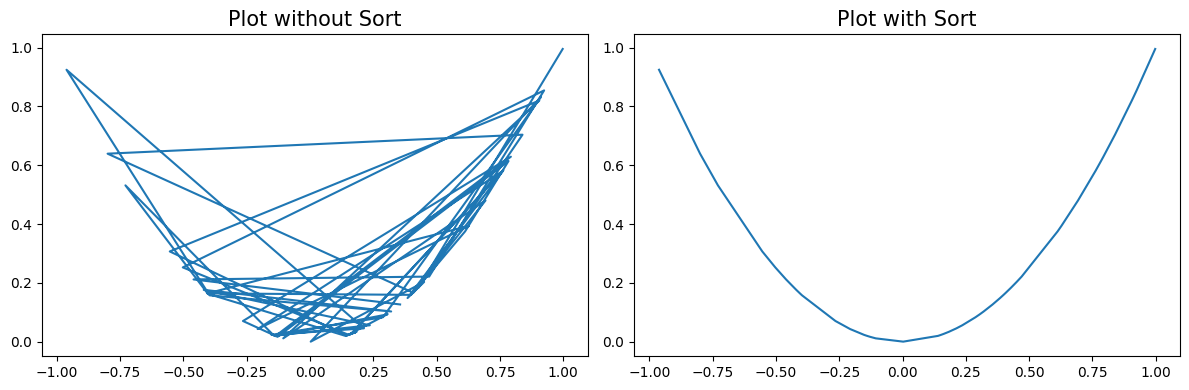

In [ ]:
def main():
    x = np.random.uniform(-1, 1, size=(50,))
    y = x**2

    x_sorted = x[np.argsort(x)] 
    y_sorted = x_sorted**2

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4))
    
    ax0.set_title("Plot without Sort", fontsize=15)
    ax0.plot(x, y)
    
    ax1.set_title("Plot with Sort", fontsize=15)
    ax1.plot(x_sorted, y_sorted)
    
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main() 

####***Section 4 How to Search***

#####***Function - np.searchsorted [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=2h49m3s) [doc](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)***

In [ ]:
def main():
    a = np.array([0,1,2,3,4,5,6,7,8,9]) # sorted numpy array
    v = 3.14
    idx = np.searchsorted(a, v)
    print(idx)
        
if __name__ == "__main__":
    main()

4


####***Section 5 Functions***

#####***Function - np.round***

In [ ]:
def main():
    x = np.round(3.146592, 2)
    print(x) 

if __name__ == "__main__":
    main()

3.15


In [ ]:
def main():
    x = np.round(-3.146592, 2)
    print(x) 

if __name__ == "__main__":
    main()

-3.15


In [ ]:
def main():
    x = np.array([93.324, 84.237, -73.237, 68.342])
    print(x, end="\n\n")
    
    x = np.round(x, 2)
    print(x) 

if __name__ == "__main__":
    main()

[93.324 84.234 73.234 68.342]

[93.32 84.23 73.23 68.34]


In [ ]:
def main():
    x = np.array([
        [93.324, 84.237, -73.237, 68.342],
        [97.234, 67.236, -57.236, 23.567],
        [87.243, 87.423, -38.253, 77.342]
        ])
    print(x, end="\n\n")
    
    x = np.round(x, 2)
    print(x) 

if __name__ == "__main__":
    main()

[[ 93.324  84.237 -73.237  68.342]
 [ 97.234  67.236 -57.236  23.567]
 [ 87.243  87.423 -38.253  77.342]]

[[ 93.32  84.24 -73.24  68.34]
 [ 97.23  67.24 -57.24  23.57]
 [ 87.24  87.42 -38.25  77.34]]


In [ ]:
def main():
    x = np.array([
        [93.324, 84.237, -73.237, 68.342],
        [97.234, 67.236, -57.236, np.nan],
        [87.243, np.nan, -38.253, 77.342]
        ])
    print(x, end="\n\n")
    
    x = np.round(x, 2)
    print(x) 

if __name__ == "__main__":
    main()

[[ 93.324  84.237 -73.237  68.342]
 [ 97.234  67.236 -57.236     nan]
 [ 87.243     nan -38.253  77.342]]

[[ 93.32  84.24 -73.24  68.34]
 [ 97.23  67.24 -57.24    nan]
 [ 87.24    nan -38.25  77.34]]


#####***Function - np.isnan***

In [ ]:
def main():
    x = np.array([
        [93., 84., 73., 68.],
        [97., 67., 57., np.nan],
        [87., 87., np.nan, 77.]
        ])
    print(x, end="\n\n")
    
    bool_nan = np.isnan(x)
    print(bool_nan) 

if __name__ == "__main__":
    main()

[[93. 84. 73. 68.]
 [97. 67. 57. nan]
 [87. 87. nan 77.]]

[[False False False False]
 [False False False  True]
 [False False  True False]]


#####***Function - np.nonzero [doc](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html)***

In [ ]:
def main():
    np.random.seed(80085)
    scores = np.round(np.random.uniform(low=30, high=100, size=10))
    print(scores)

    print(scores < 60.)
    print(np.nonzero(scores < 60.))
    print(np.nonzero(scores < 60.)[0][:3])

    scores[np.nonzero(scores < 60.)[0][:3]] = 0.
    print(scores)
        
if __name__ == "__main__":
    main()

[55. 32. 84. 96. 41. 46. 96. 94. 48. 91.]
[ True  True False False  True  True False False  True False]
(array([0, 1, 4, 5, 8]),)
[0 1 4]
[ 0.  0. 84. 96.  0. 46. 96. 94. 48. 91.]


###***Chapter 6 Indexing and Slicing***

####***Section 1 Indexing***

#####***Positive Indexing [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=19m17s)***

In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    print(f"{a[1] = }")

    b = np.array(a)
    print(f"{b[1] = }")

if __name__ == "__main__":
    main()

a[1] = 1
b[1] = 1


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    print(f"{a[1] = }")

    b = np.array(a)
    print(f"{b[1] = }")

if __name__ == "__main__":
    main()

a[1] = [1, 2, 3]
b[1] = array([1, 2, 3])


#####***Negative Indexing [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=28m49s)***

In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    print(f"{a[-2] = }")

    b = np.array(a)
    print(f"{b[-2] = }")

if __name__ == "__main__":
    main()

a[-2] = 8
b[-2] = 8


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    print(f"{a[-2] = }")

    b = np.array(a)
    print(f"{b[-2] = }")

if __name__ == "__main__":
    main()

a[-2] = [3, 4, 5]
b[-2] = array([3, 4, 5])


#####***List-like Indexing***

In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    print(f"{a[1][1] = }") # list-like Indexing

    b = np.array(a)
    print(f"{b[1][1] = }") # list-like Indexing

if __name__ == "__main__":
    main()

1 1


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    print(f"{a[-2][-2] = }") # list-like Indexing

    b = np.array(a)
    print(f"{b[-2][-2] = }") # list-like Indexing

if __name__ == "__main__":
    main()

#####***Numpy Only Indexing***

In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    try:
        print(f"{a[1,1] = }") # Numpy Only Indexing
    except TypeError as e:
        print(e)

    b = np.array(a)
    print(f"{b[1,1] = }") # Numpy Only Indexing

if __name__ == "__main__":
    main()

list indices must be integers or slices, not tuple
1


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    try:
        print(f"{a[-2,-2] = }") # Numpy Only Indexing
    except TypeError as e:
        print(e)

    b = np.array(a)
    print(f"{b[-2,-2] = }") # Numpy Only Indexing

if __name__ == "__main__":
    main()

####***Section 2 Slicing [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=39m43s)***

#####***Slicing with 1D Array***

In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    print(f"{a[1:2] = }")
    print(f"{b[1:2] = }")
    
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[1:2] = [1]
b[1:2] = array([1])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    print(f"{a[:5] = }")
    print(f"{b[:5] = }")
        
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[:5] = [0, 1, 2, 3, 4]
b[:5] = array([0, 1, 2, 3, 4])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    print(f"{a[1:] = }")
    print(f"{b[1:] = }")    
    
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[1:] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
b[1:] = array([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")
    
    print(f"{a[:5:2] = }")
    print(f"{b[:5:2] = }")  
    
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[:5:2] = [0, 2, 4]
b[:5:2] = array([0, 2, 4])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")

    print(f"{a[1::2] = }")
    print(f"{b[1::2] = }")   
    
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[1::2] = [1, 3, 5, 7, 9]
b[1::2] = array([1, 3, 5, 7, 9])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array([0,1,2,3,4,5,6,7,8,9])
    print(f"{a = }")
    print(f"{b = }", end="\n\n")

    print(f"{a[::-1] = }")
    print(f"{b[::-1] = }")   
    
if __name__ == "__main__":
    main()

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

a[::-1] = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
b[::-1] = array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])


#####***Slicing with 2D Array***

In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")
    
    print("a[1:2]")
    print(a[1:2], end="\n\n")
    print("b[1:2]")
    print(b[1:2], end="\n\n")
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

a[1:2]
[[1, 2, 3]]

b[1:2]
[[1 2 3]]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")
    
    print("a[:3]")
    print(a[:3], end="\n\n")
    print("b[:3]")
    print(b[:3], end="\n\n")    
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

a[:3]
[[0, 1, 2], [1, 2, 3], [2, 3, 4]]

b[:3]
[[0 1 2]
 [1 2 3]
 [2 3 4]]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")
    
    print("a[:4:2]")
    print(a[:4:2], end="\n\n")
    print("b[:4:2]")
    print(b[:4:2], end="\n\n")
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

a[:4:2]
[[0, 1, 2], [2, 3, 4]]

b[:4:2]
[[0 1 2]
 [2 3 4]]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")

    print("a[1::2]")
    print(a[1::2], end="\n\n")
    print("b[1::2]")
    print(b[1::2], end="\n\n")
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

a[1::2]
[[1, 2, 3], [3, 4, 5]]

b[1::2]
[[1 2 3]
 [3 4 5]]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")

    print("a[::-1]")
    print(a[::-1], end="\n\n")
    print("b[::-1]")
    print(b[::-1], end="\n\n")    
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

a[::-1]
[[4, 5, 6], [3, 4, 5], [2, 3, 4], [1, 2, 3], [0, 1, 2]]

b[::-1]
[[4 5 6]
 [3 4 5]
 [2 3 4]
 [1 2 3]
 [0 1 2]]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")

    try:
        print(a[1,:]) 
    except TypeError as e:
        print(e)
    print("b[1,:]")
    print(b[1,:], end="\n\n")  
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

list indices must be integers or slices, not tuple
b[1,:]
[1 2 3]



In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array([[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    print("a")
    print(a, end="\n\n")
    print("b")
    print(b, end="\n\n")

    try:
        print(a[:,1]) 
    except TypeError as e:
        print(e)
    print("b[:,1]")
    print(b[:,1], end="\n\n")    
    
if __name__ == "__main__":
    main()

a
[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

b
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]

list indices must be integers or slices, not tuple
b[:,1]
[1 2 3 4 5]



####***Section 3 Shape Change after Indexing and Slicing***

In [ ]:
def main():
    a = np.zeros((8,8,8,8))
    print(f"{a[1].shape = }")
    print(f"{a[1:2].shape = }")
    print(f"{a[1,:,3,:].shape = }")
    print(f"{a[1:2,:,3,:].shape = }")
    print(f"{a[1:2,:,3:4,:].shape = }")   
    
if __name__ == "__main__":
    main()

a[1].shape = (8, 8, 8)
a[1:2].shape = (1, 8, 8, 8)
a[1,:,3,:].shape = (8, 8)
a[1:2,:,3,:].shape = (1, 8, 8)
a[1:2,:,3:4,:].shape = (1, 8, 1, 8)


####***Section 4 Image with Numpy Array Indexing and Slicing [eng](https://www.youtube.com/watch?v=xECXZ3tyONo)***

#####***R, G, B(, Alpha) Chanel***

(227, 185, 4)


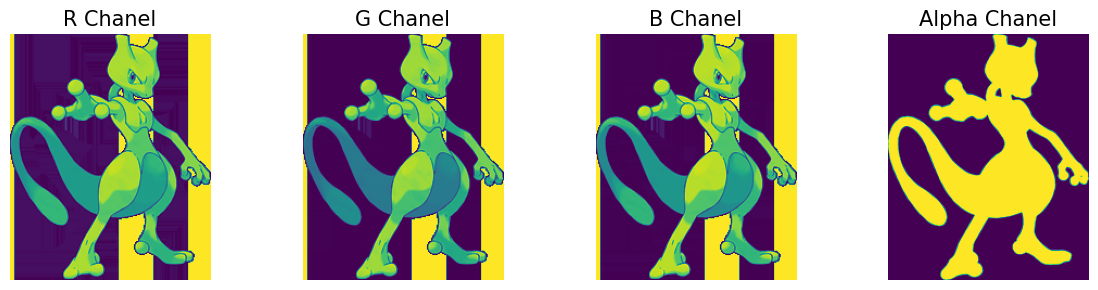

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    print(img.shape)

    fig, axes = plt.subplots(1,4,figsize=(12,3))
    for i, title in enumerate(["R Chanel","G Chanel","B Chanel","Alpha Chanel"]):
        axes[i].set_title(title, fontsize=15)
        axes[i].imshow(img[:,:,i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

#####***Image Manipulation Using Indexing and Slicing***

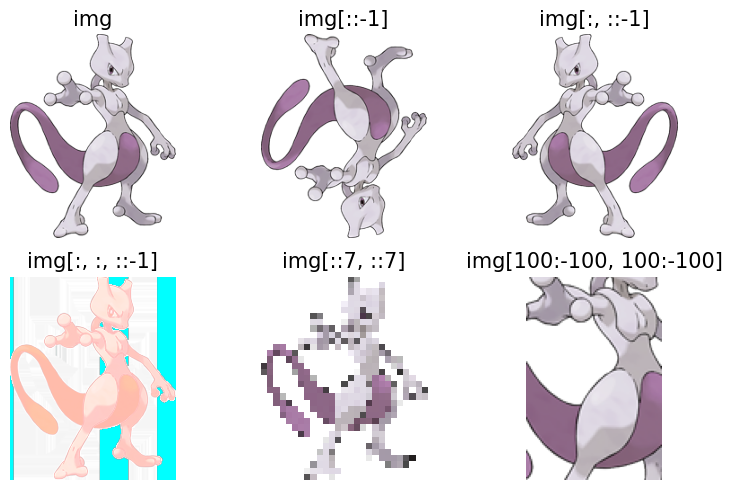

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    imgs = ( img, img[::-1], img[:, ::-1], img[:, :, ::-1], img[::7, ::7], img[50:-50, 50:-50] )
    imgs_title = ( "img", "img[::-1]", "img[:, ::-1]", "img[:, :, ::-1]", "img[::7, ::7]", "img[100:-100, 100:-100]" ) 
    
    fig, axes = plt.subplots(2,3,figsize=(5*1.61803398875,5))
    for ax, img_to_plot, img_title in zip( axes.reshape((-1,)), imgs, imgs_title ):
        ax.set_title(img_title, fontsize=15)
        ax.imshow(img_to_plot)
        ax.axis('off')
    plt.tight_layout()
    plt.show()    

if __name__ == "__main__":
    main()

#####***Image Manual Grid***

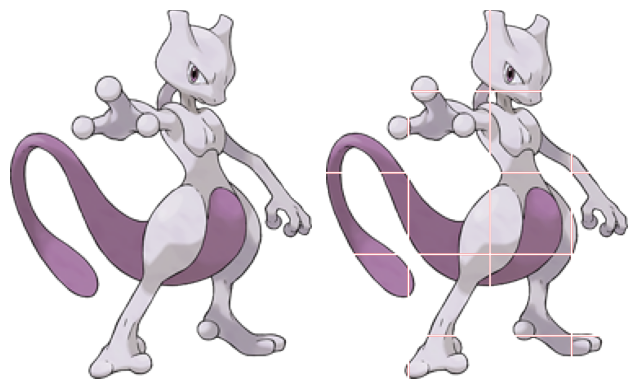

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(4*1.61803398875,4))

    ax0.imshow( img )
    
    spacing = 50
    img_copy = img.copy()
    img_copy[spacing:-1:spacing, :] = [255, 0, 0, 1]
    img_copy[:, spacing:-1:spacing] = [255, 0, 0, 1]
    ax1.imshow( img_copy )
    
    for ax in (ax0, ax1):
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()  

if __name__ == "__main__":
    main()

#####***np.where***

$$\begin{array}{cccccccccccccc}
b&=&\text{np.where(}&a < 5&,&a&,&10*a&\text{)}\\
&&&\text{True}&\Rightarrow&a&&&\\
&&&\text{False}&\Rightarrow&\Rightarrow&\Rightarrow&10*a&\\
\end{array}$$

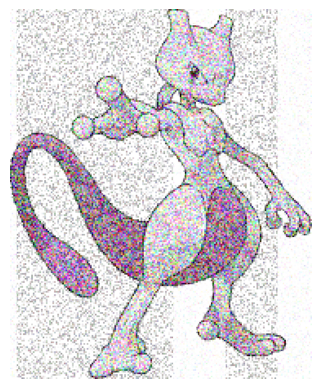

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    img_noisy = img + np.random.randint(-100, 101, size=img.shape)
    img_noisy = np.where(img_noisy>=0, img_noisy, 0)
    img_noisy = np.where(img_noisy<=255, img_noisy, 255)
    
    fig, ax = plt.subplots()
    ax.imshow(img_noisy)
    ax.axis('off')
    plt.show()    

if __name__ == "__main__":
    main()

#####***np.transpose***

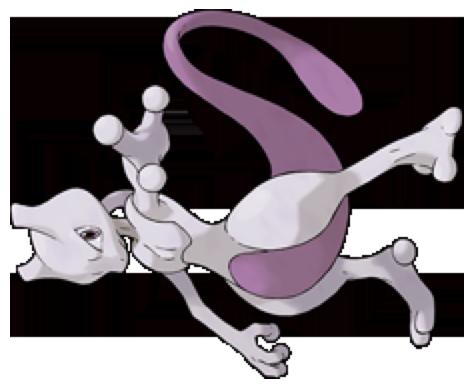

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    
    img_T = np.empty((img.shape[1], img.shape[0], 3), dtype=np.uint8) 
    img_T[:,:,0] = img[:,:,0].T
    img_T[:,:,1] = img[:,:,1].T
    img_T[:,:,2] = img[:,:,2].T
    
    fig, ax = plt.subplots()
    ax.imshow(img_T)
    ax.axis('off')
    plt.show()    

if __name__ == "__main__":
    main()

#####***np.roll***

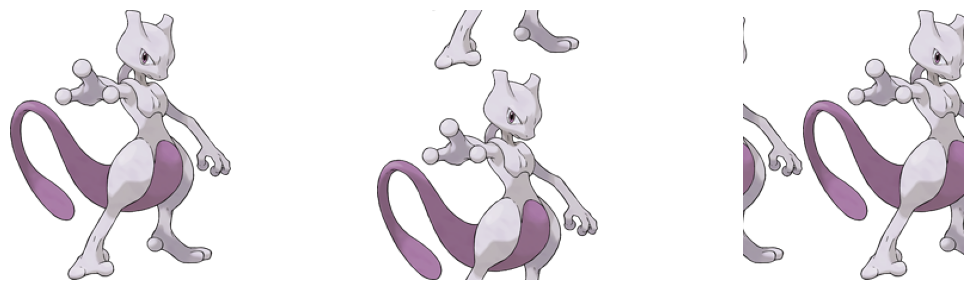

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))

    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,3))
    
    ax0.imshow( img )
    ax1.imshow( np.roll(img, 50, axis=0) )
    ax2.imshow( np.roll(img, 50, axis=1) )
    
    for ax in (ax0, ax1, ax2):
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()   

if __name__ == "__main__":
    main()

####***Section 5 Fancy Indexing***

In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array(a)
    print(f"{b[[0,1,3]] = }")

if __name__ == "__main__":
    main()

b[[0,1,3]] = array([0, 1, 3])


In [ ]:
def main():
    a = [0,1,2,3,4,5,6,7,8,9]
    b = np.array(a)
    print(f"{b[np.array([0,1,3])] = }")

if __name__ == "__main__":
    main()

b[np.array([0,1,3])] = array([0, 1, 3])


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array(a)
    print(f"{b[[0,1,3]] = }")

if __name__ == "__main__":
    main()

b[[0,1,3]] = array([[0, 1, 2],
       [1, 2, 3],
       [3, 4, 5]])


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array(a)
    print(f"{b[np.array([0,1,3])] = }")

if __name__ == "__main__":
    main()

b[np.array([0,1,3])] = array([[0, 1, 2],
       [1, 2, 3],
       [3, 4, 5]])


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array(a)
    print(f"{b[[0,1,3],[0,0,-1]] = }")

if __name__ == "__main__":
    main()

b[[0,1,3],[0,0,-1]] = array([0, 1, 5])


In [ ]:
def main():
    a = [[0,1,2],[1,2,3],[2,3,4],[3,4,5],[4,5,6]]
    b = np.array(a)
    print(f"{b[np.array([0,1,3]),np.array([0,0,-1])] = }")

if __name__ == "__main__":
    main()

b[np.array([0,1,3]),np.array([0,0,-1])] = array([0, 1, 5])


###***Chapter 7 Filtering and Masking***

####***Section 1 Filtering***

#####***1D Array Filtering***

In [ ]:
def main():
    a = np.array([1,2,3])
    b = [True,False,True]
    c = a[b]
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([1, 3])


In [ ]:
def main():
    a = np.array([1,2,3])
    b = np.array([True,False,True])
    c = a[b]
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([1, 3])


In [ ]:
def main():
    a = np.array([1,2,3])
    b = ( a % 2 == 1 )
    print(f"{b = }")
    print(f"{type(b) = }")

    c = a[b]
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

b = array([ True, False,  True])
type(b) = <class 'numpy.ndarray'>
c = array([1, 3])


#####***2D Array Filtering***

In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    b = [[True,False,True],[False,True,False]]
    try:
        c = a[b]
        print(f"{c = }")
    except IndexError as e:
        print(e)
       
if __name__ == "__main__":
    main()

boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 3


<ipython-input-19-8706a0894b01>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  c = a[b]


In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    b = np.array([[True,False,True],[False,True,False]])
    c = a[b]
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([1, 3, 5])


In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    b = ( a % 2 == 1 )
    print(f"{b = }")
    print(f"{type(b) = }")

    c = a[b]
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

b = array([[ True, False,  True],
       [False,  True, False]])
type(b) = <class 'numpy.ndarray'>
c = array([1, 3, 5])


####***Section 2 Boolean Masking***

#####***1D Array Boolean Masking***

In [ ]:
def main():
    a = np.array([1,2,3])
    b = [True,False,True]
    a[b] = 0
    print(a)
       
if __name__ == "__main__":
    main()

[0 2 0]


In [ ]:
def main():
    a = np.array([1,2,3])
    b = np.array([True,False,True])
    a[b] = 0
    print(a)
       
if __name__ == "__main__":
    main()

[0 2 0]


In [ ]:
def main():
    a = np.array([1,2,3])
    a[a%2==1] = 0
    print(a)
       
if __name__ == "__main__":
    main()

[0 2 0]


#####***2D Array Boolean Masking***

In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    b = [[True,False,True],[False,True,False]]
    try:
        a[b] = 0
        print(a)
    except IndexError as e:
        print(e)
       
if __name__ == "__main__":
    main()

boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 3


<ipython-input-25-96d810cccabe>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a[b] = 0


In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    b = np.array([[True,False,True],[False,True,False]])
    a[b] = 0
    print(a)
       
if __name__ == "__main__":
    main()

[[0 2 0]
 [4 0 6]]


In [ ]:
def main():
    a = np.array([[1,2,3],[4,5,6]])
    a[a%2==1] = 0
    print(a)
       
if __name__ == "__main__":
    main()

[[0 2 0]
 [4 0 6]]


#####***Image Boolean Masking***

img.shape = (227, 185, 4)
img.dtype = dtype('uint8')



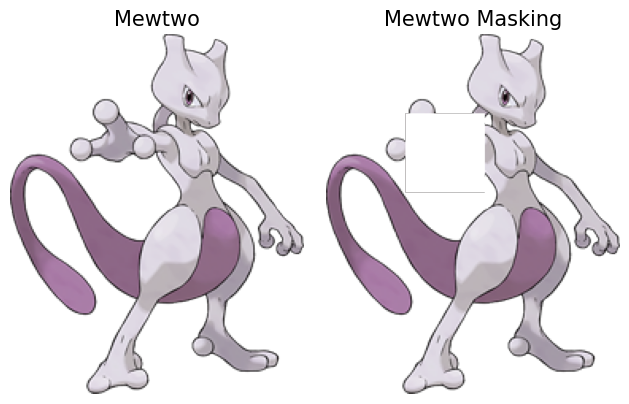

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    print(f"{img.shape = }")
    print(f"{img.dtype = }",end="\n\n")

    mask = np.zeros(shape=img.shape[:2], dtype=bool)
    mask[50:100, 50:100] = True
    img_copy = img.copy()
    img_copy[mask] = [255, 255, 255, 255]

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(4*1.61803398875,4))
    
    ax0.set_title("Mewtwo", fontsize=15)
    ax0.imshow( img )
    
    ax1.set_title("Mewtwo Masking", fontsize=15)
    ax1.imshow( img_copy )
    
    for ax in (ax0, ax1):
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()  

if __name__ == "__main__":
    main()

#####***Coin Flips using Boolean Masking***

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Generalized_inversion_method.svg/720px-Generalized_inversion_method.svg.png" width=30%>

[Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

$$
\displaystyle
X=F^{-1}(U)
$$

In [ ]:
def main():
    n = 10 # number_of_coin_flips
    p = 0.5 # probability_of_head

    c = np.zeros(n) # coin outcomes
    u = np.random.rand(n) # uniform random variables
    c[u>1-p] = 1 # coin flips using boolean masking

    # check the smirnov transform, relation between u and c
    # if ui <= 1-p, then ci = 0
    # if ui > 1-p, then ci = 1
    for ui, ci in zip(u,c):
        print(f"{ui = :.3}, {ui>1-p = }, {ci = }") 

if __name__ == "__main__":
    main()

ui = 0.447, ui>1-p = False, ci = 0.0
ui = 0.846, ui>1-p = True, ci = 1.0
ui = 0.699, ui>1-p = True, ci = 1.0
ui = 0.297, ui>1-p = False, ci = 0.0
ui = 0.814, ui>1-p = True, ci = 1.0
ui = 0.397, ui>1-p = False, ci = 0.0
ui = 0.881, ui>1-p = True, ci = 1.0
ui = 0.581, ui>1-p = True, ci = 1.0
ui = 0.882, ui>1-p = True, ci = 1.0
ui = 0.693, ui>1-p = True, ci = 1.0


#####***Simulation - Coin Flip*** [한국어](https://www.youtube.com/watch?v=A1u3LOPNOIo&list=PLXziV1DL41oieG80C_rv4ITBcOm7KqFf4)

In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using for loop
    for i in range(n):
        if np.random.uniform() > 1 - p: 
            print("H", end=' ')
        else:
            print("T", end=' ')
    print("\n\n")

if __name__ == "__main__":
    main()

H H H H T H T H H T H H H H T T T H H H H H T H T H T H H T 




In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using list append method
    coin = []
    for i in range(n):
        if np.random.uniform() > 1 - p:
            coin.append("H")
        else:
            coin.append("T")
    print(coin, end="\n\n")

if __name__ == "__main__":
    main()

['T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T']



In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using list comprehension
    uniform = np.random.uniform(size=(n,)) 
    coin = ['H' if (x > 1 - p) else 'T' for x in uniform]
    print(coin, end="\n\n")

if __name__ == "__main__":
    main()

['T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'H']



In [ ]:
def main():
    n = 30
    p = 0.5

    # coin flips using vectorization
    uniform = np.random.uniform(size=(n,))
    coin = np.zeros_like(uniform)
    coin[uniform > 1-p] = 1.
    print(coin)

if __name__ == "__main__":
    main()

[0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1.]


####***Section 3 np.where Masking***

#####***np.where(1D Array Condition)***

In [ ]:
def main():
    a = np.array([1,2,2,3,2,4,4,2])
    b = np.where(a==2)
    print(f"{b = }")
       
if __name__ == "__main__":
    main()

b = (array([1, 2, 4, 7]),)


#####***np.where(2D Array Condition)***

In [ ]:
def main():
    a = np.array([[1,2],[2,3],[2,4],[4,2]])
    b = np.where(a==2)
    print(f"{b = }")
       
if __name__ == "__main__":
    main()

b = (array([0, 1, 2, 3]), array([1, 0, 0, 1]))


#####***np.where(3D Array Condition)***

In [ ]:
def main():
    a = np.array([[1,2],[2,3],[2,4],[4,2]])
    a = np.array([a,a])
    b = np.where(a==2)
    print(f"{b = }")
       
if __name__ == "__main__":
    main()

b = (array([0, 0, 0, 0, 1, 1, 1, 1]), array([0, 1, 2, 3, 0, 1, 2, 3]), array([1, 0, 0, 1, 1, 0, 0, 1]))


#####***np.where Masking***

$$\begin{array}{ccccccccccccccc}
\text{c}&=&\text{np.where(}&\text{a==2}&,&\text{a}&,&\text{b}&\text{)}\\
&&&\uparrow&&\uparrow&&\uparrow&\\
&&&\text{Condition}&&\text{If Condition holds,}&&\text{If Condition does not hold,}&\\
&&&&&\text{take values}&&\text{take values}&\\
&&&&&\text{from this numpy array}&&\text{from this numpy array}&\\
\end{array}$$

In [ ]:
def main():
    a = np.array([1,2,2,3,2,4,4,2])
    b = a * 10
    c = np.where(a==2, a, b)
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([10,  2,  2, 30,  2, 40, 40,  2])


In [ ]:
def main():
    a = np.array([[1,2],[2,3],[2,4],[4,2]])
    b = a * 10
    c = np.where(a==2, a, b)
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([[10,  2],
       [ 2, 30],
       [ 2, 40],
       [40,  2]])


In [ ]:
def main():
    a = np.array([[1,2],[2,3],[2,4],[4,2]])
    a = np.array([a,a])
    b = a * 10
    c = np.where(a==2, a, b)
    print(f"{c = }")
       
if __name__ == "__main__":
    main()

c = array([[[10,  2],
        [ 2, 30],
        [ 2, 40],
        [40,  2]],

       [[10,  2],
        [ 2, 30],
        [ 2, 40],
        [40,  2]]])


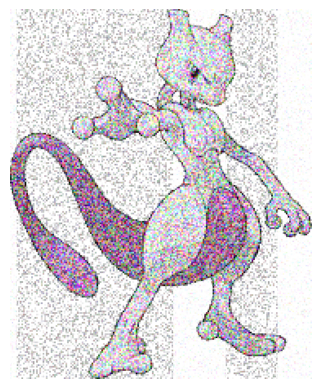

In [ ]:
import PIL
import urllib

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    img_noisy = img + np.random.randint(-100, 101, size=img.shape)
    img_noisy = np.where(img_noisy>=0, img_noisy, 0)
    img_noisy = np.where(img_noisy<=255, img_noisy, 255)
    
    fig, ax = plt.subplots()
    ax.imshow(img_noisy)
    ax.axis('off')
    plt.show()    

if __name__ == "__main__":
    main()

###***Chapter 8 Component-Wise Operations***

####***Section 1 Simple Component-Wise Operations [eng](https://www.youtube.com/watch?v=hNe8hNHfHzM&list=PL9oKUrtC4VP6gDp1Vq3BzfViO0TWgR0vR&index=9)***

#####***Addition***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]])
    b = np.array([[1, 1], [2, 3]])
    c = a + b
    
    print("a")
    print(a, end="\n\n")
    
    print("b")
    print(b, end="\n\n")
    
    print("a + b")
    print(c)
    
    
if __name__ == "__main__":
    main()

#####***Substraction***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]])
    b = np.array([[1, 1], [2, 3]])
    c = a - b
    
    print("a")
    print(a, end="\n\n")
    
    print("b")
    print(b, end="\n\n")
    
    print("a - b")
    print(c)
    
    
if __name__ == "__main__":
    main()

#####***Multiplication***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]])
    b = np.array([[1, 1], [2, 3]])
    c1 = a * b
    c2 = np.multiply(a, b)
    c3 = a.__mul__(b)
    
    print("a * b")
    print(c1, end="\n\n")
    
    print("np.multiply(a, b)")
    print(c2, end="\n\n")
    
    print("a.__mul__(b)")
    print(c3)
    
    
if __name__ == "__main__":
    main()

#####***Division***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]])
    b = np.array([[1, 1], [2, 3]])
    c = a / b
    
    print("a")
    print(a, end="\n\n")
    
    print("b")
    print(b, end="\n\n")
    
    print("a / b")
    print(c)
    
    
if __name__ == "__main__":
    main()

a
[[1 1]
 [2 3]]

b
[[1 1]
 [2 3]]

a / b
[[1. 1.]
 [1. 1.]]


#####***Modulo***

In [ ]:
def main():
    a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
    b = a % 2
    
    print("a")
    print(a, end="\n\n")
    
    print("a % 2")
    print(b, end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Floor Division***

In [ ]:
def main():
    a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
    b = a // 2
    
    print("a")
    print(a, end="\n\n")
    
    print("a // 2")
    print(b, end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Ceil, Floor, and Round***

In [ ]:
def main():
    a = np.array([[3.1, 3.6], [0.2, 0.7]])
    print("a")
    print(a, end="\n\n")    
    
    print("np.ceil(a)")
    print(np.ceil(a), end="\n\n")
    
    print("np.floor(a)")
    print(np.floor(a), end="\n\n")
    
    print("np.round(a)")
    print(np.round(a), end="\n\n")
    
    
if __name__ == "__main__":
    main()

a
[[3.1 3.6]
 [0.2 0.7]]

np.ceil(a)
[[4. 4.]
 [1. 1.]]

np.floor(a)
[[3. 3.]
 [0. 0.]]

np.round(a)
[[3. 4.]
 [0. 1.]]



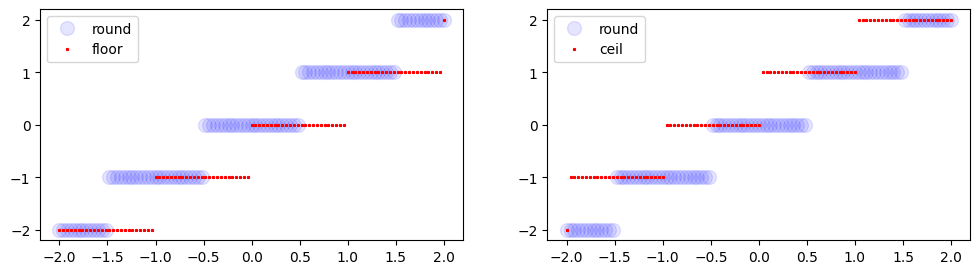

In [ ]:
def main():
    x = np.linspace(-2,2,101)
    y_round = np.round(x)
    y_floor = np.floor(x)
    y_ceil = np.ceil(x)

    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))

    ax0.plot(x,y_round,'ob',label="round",ms=10,alpha=0.1)
    ax1.plot(x,y_round,'ob',label="round",ms=10,alpha=0.1)

    ax0.plot(x,y_floor,'*r',label="floor",ms=2)
    ax1.plot(x,y_ceil,'*r',label="ceil",ms=2)

    ax0.legend()
    ax1.legend()

    plt.show()

if __name__ == "__main__":
    main()

#####***Trunc and Fix [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=35&t=6h32m51s) [doc](https://numpy.org/doc/stable/reference/generated/numpy.fix.html)***

There is no difference in the results. Both functions, though implemented differently internally, produce the same results on the same set of input types and produce the same results in both value and type. There is no good reason for having both functions, particularly when one will work more slowly and/or take more resources than the other and both must be maintained for as long as numpy survives. Quite frankly, this is one problem with Python and many other design-by-committee projects, and you see debates over this trunc/fix issue in other language and library development projects like Julia.

[stackoverflow](https://stackoverflow.com/questions/68579299/what-is-the-difference-between-numpy-fix-and-numpy-trunc)

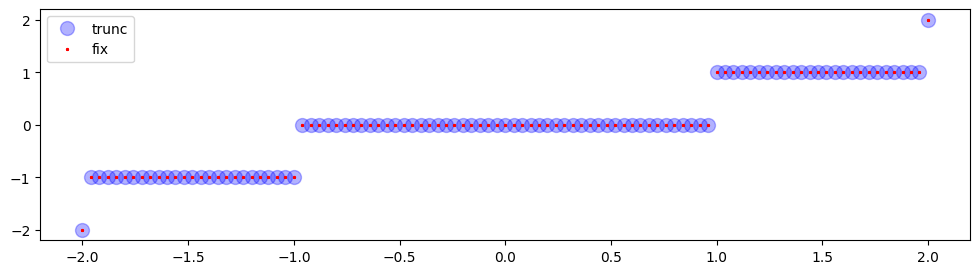

In [ ]:
def main():
    x = np.linspace(-2,2,101)
    y_trunc = np.trunc(x)
    y_fix = np.fix(x)

    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(x,y_trunc,'ob',label="trunc",ms=10,alpha=0.3)
    ax.plot(x,y_fix,'*r',label="fix",ms=2)
    ax.legend()
    plt.show()

if __name__ == "__main__":
    main()

####***Section 2 More Advanced Component-Wise Operations***

#####***Power***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]])
    print("a")
    print(a, end="\n\n")
    
    b1 = a**2
    b2 = np.power(a, 2)
    print("a**2")
    print(b1, end="\n\n")
    print("np.power(a, 2)")
    print(b2, end="\n\n")
    
    c1 = 2**a
    c2 = np.power(2, a)
    print("2**a")
    print(c1, end="\n\n")
    print("np.power(2, a)")
    print(c2, end="\n\n")
    
    
if __name__ == "__main__":
    main()

#####***Exponential and Logarithm***

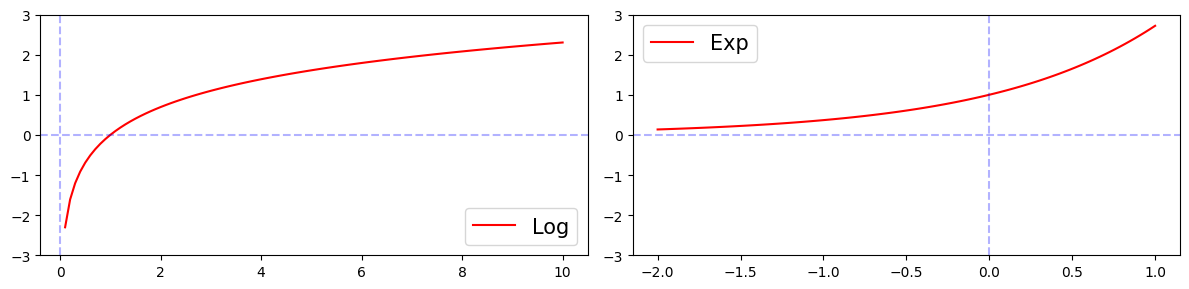

In [ ]:
def main():
    x_log = np.linspace(0.1, 10, 100)
    log = np.log(x_log)
    x_exp = np.linspace(-2, 1, 100)
    exp = np.exp(x_exp)
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,3))
    
    ax0.plot(x_log, log, color='red', label='Log')
    ax1.plot(x_exp, exp, color='red', label='Exp')
    
    for ax in (ax0, ax1):
        ax.axhline(0, linestyle='--', alpha=0.3, color='blue')
        ax.axvline(0, linestyle='--', alpha=0.3, color='blue')
        ax.legend(fontsize=15)
        ax.set_ylim(-3,3)
    
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    main()

#####***Trigonometric Functions***

In [ ]:
def main():
    x = np.linspace(-np.pi/2+1e-1, np.pi/2-1e-1, 100)
    sin = np.sin(x)
    cos = np.cos(x)
    tan = np.tan(x)
    
    fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12, 3))
    
    ax0.plot(x, sin, color='red', label='sin(x)')
    ax1.plot(x, cos, color='red', label='cos(x)')
    ax2.plot(x, tan, color='red', label='tan(x)')
    
    for ax in (ax0, ax1, ax2):
        ax.axhline(0, linestyle='--', alpha=0.3, color='blue')
        ax.axvline(0, linestyle='--', alpha=0.3, color='blue')
        ax.set_xticks([-np.pi/2, 0, np.pi/2])
        ax.set_xticklabels(['-$\pi/2$', 0, '$\pi/2$'])
        ax.legend(fontsize=15)
    
    plt.tight_layout()
    plt.show()   
    
if __name__ == "__main__":
    main()

####***Section 3 Comparison***

#####***Comparison***

In [ ]:
def main():
    print(np.array([3, 7]) < 5)       # [ True  False ]
    print(np.array([3, 7]) != 5)      # [ True  True  ]
    print(np.array([3, 7]) == 5)      # [ False False ]
    print(np.array([3, 7]) >= 5)      # [ False True  ]
    
    
if __name__ == "__main__":
    main()

####***Section 4 Out Keyword***

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function:

Python Data Science Handbook by Jake Vanderplas [github](https://github.com/jakevdp/PythonDataScienceHandbook)

In [ ]:
def main():
    x = np.arange(5) 
    y = np.zeros(5)
    print("Before")
    print(f"{y = }")
    np.multiply(x, 10, out=y)
    print("After")
    print(f"{y = }", end="\n\n")
    
    y = np.zeros(10)
    np.power(2, x, out=y[::2])
    print(y)
    
    
if __name__ == "__main__":
    main()

####***Section 5 Broadcasting***

#####***Broadcasting***

<img src="https://www.python-course.eu/images/broadcasting_example_1.png" width="40%">

[www.python-course.eu](https://www.python-course.eu/images/broadcasting_example_1.png)

In [ ]:
def main():
    A = np.array([[0,1],[21,22]]) # (2,2)
    B = np.array([[1,2]]) # (1,2)
    C = A * B
    print(C, end="\n\n")

    A = np.array([[0,1],[21,22]]) # (2,2)
    B = np.array([1,2]) # (2,)
    C = A + B
    print(C, end="\n\n")

    A = np.array([[1,2],[3,4]]) # (2,2) 
    B = 5 # (,)
    C = A + B
    print(C)

    
if __name__ == "__main__":
    main()

[[ 0  2]
 [21 44]]

[[ 1  3]
 [22 24]]

[[6 7]
 [8 9]]


#####***Broadcasting Rule***

$$\begin{array}{lll}
s_1=s_2&\Rightarrow&\text{OK}\\
s_1\neq s_2,\ \text{but one of them is 1}&\Rightarrow&\text{OK}\\
\text{one of them does not exist}&\Rightarrow&\text{OK}\\
s_1\neq s_2,\ s_1\neq 1, s_2\neq 1&\Rightarrow&\text{NOT OK}\\
\end{array}$$

In [ ]:
def main():
    A = np.random.normal(size=(8,1,4,1))
    B = np.random.normal(size=(7,1,5))
    C = A + B
    print(A.shape)
    print(f'   {B.shape}')
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(8, 1, 4, 1)
   (7, 1, 5)
(8, 7, 4, 5)



In [ ]:
def main():
    A = np.random.normal(size=(5,4))
    B = np.random.normal(size=(1,))
    C = A + B
    print(A.shape)
    print(f'   {B.shape}')
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(5, 4)
   (1,)
(5, 4)



In [ ]:
def main():
    A = np.random.normal(size=(5,4))
    B = np.random.normal(size=(4,))
    C = A + B
    print(A.shape)
    print(f'   {B.shape}')
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(5, 4)
   (4,)
(5, 4)



In [ ]:
def main():
    A = np.random.normal(size=(15,3,5))
    B = np.random.normal(size=(15,1,5))
    C = A + B
    print(A.shape)
    print(B.shape)
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(15, 3, 5)
(15, 1, 5)
(15, 3, 5)



In [ ]:
def main():
    A = np.random.normal(size=(15,3,5))
    B = np.random.normal(size=(3,5))
    C = A + B
    print(A.shape)
    print(f'    {B.shape}')
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(15, 3, 5)
    (3, 5)
(15, 3, 5)



In [ ]:
def main():
    A = np.random.normal(size=(15,3,5))
    B = np.random.normal(size=(3,1))
    C = A + B
    print(A.shape)
    print(f'    {B.shape}')
    print(C.shape, end="\n\n")
   
if __name__ == "__main__":
    main()

(15, 3, 5)
    (3, 1)
(15, 3, 5)



In [ ]:
def main():
    A = np.random.normal(size=(2,3))
    B = np.random.normal(size=(2,7))
    try:
        C = A + B
        print(A.shape)
        print(B.shape)
        print(C.shape)
    except ValueError as e:
        print(e, end="\n\n")
   
if __name__ == "__main__":
    main()

operands could not be broadcast together with shapes (2,3) (2,7) 



In [ ]:
def main():
    A = np.random.normal(size=(3,1))
    B = np.random.normal(size=(8,4,3))
    try:
        C = A + B
        print(A.shape)
        print(B.shape)
        print(C.shape)
    except ValueError as e:
        print(e, end="\n\n")
   
if __name__ == "__main__":
    main()

operands could not be broadcast together with shapes (3,1) (8,4,3) 



In [ ]:
def main():
    A = np.random.normal(size=(2,1))
    B = np.random.normal(size=(8,4,3))
    try:
        C = A + B
        print(A.shape)
        print(B.shape)
        print(C.shape)
    except ValueError as e:
        print(e)
   
if __name__ == "__main__":
    main()

operands could not be broadcast together with shapes (2,1) (8,4,3) 


####***Section 6 Type Casting***

#####***Type Casting***

In [ ]:
def main():
    a = np.array([0,1])
    print(f"{a.dtype = }")  

    b = np.array([0.,1.])  
    print(f"{b.dtype = }") 

    c = a + b
    print(f"{c.dtype = }") 
  
if __name__ == "__main__":
    main()

a.dtype = dtype('int64')
b.dtype = dtype('float64')
c.dtype = dtype('float64')


####***Section 7 Universal Functions***

#####***Universal Functions [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=35&t=6h4m1s) [doc](https://numpy.org/doc/stable/reference/ufuncs.html)***

A universal function (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features.

[doc](https://numpy.org/doc/stable/reference/ufuncs.html)

In [ ]:
# without component-wise op
def main():
    a = [1,2,3]
    b = [3,4,5]

    # vector addition
    c = []
    for i, j in zip(a,b):
        c.append(i+j)
    print(c)

if __name__ == "__main__":
    main()

[4, 6, 8]


In [ ]:
# with component-wise op
def main():
    a = np.array([1,2,3])
    b = np.array([3,4,5])

    # vector addition
    c = a + b
    print(c)

if __name__ == "__main__":
    main()

[4 6 8]


#####***Built-In Function - np.frompyfunc [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=35&t=6h10m7s) [doc](https://numpy.org/doc/stable/reference/generated/numpy.frompyfunc.html)***

$$\begin{array}{ccccccccc}
\text{f}&=&\text{np.frompyfunc(}&\text{str}&,&1&,&1&\text{)}\\
\uparrow&&&\uparrow&&\uparrow&&\uparrow&\\
\text{Universal}&&&\text{Python}&&\text{Number of}&&\text{Number of}&\\
\text{Function}&&&\text{Function}&&\text{Inputs}&&\text{Outputs}&\\
\end{array}$$

In [ ]:
def main():
    a = np.array([1,2,3])
    print(f"{a = }")

    # python function str is not a component-wise op
    print(f"{str(a) = }")

    # np.frompyfunc(str, 1, 1) is a component-wise op, or a universal function
    f = np.frompyfunc(str, 1, 1)
    print(f"{f(a) = }")

if __name__ == "__main__":
    main()

a = array([1, 2, 3])
str(a) = '[1 2 3]'
f(a) = array(['1', '2', '3'], dtype=object)


###***Chapter 9 Matrix Operations***

####***Section 1 Vector Addition***

#####***List Concatenation***

In [ ]:
def main():
    u = [ 5, 1 ]
    v = [ 1, 3 ]
    print(f"{u = }")
    print(f"{v = }")
    print(f"{u + v = }")
        
if __name__ == "__main__":
    main()

#####***Vector Addition***

In [ ]:
def main():
    u = np.array( [ 5, 1 ] )
    v = np.array( [ 1, 3 ] )
    print(f"{u = }")
    print(f"{v = }")
    print(f"{u + v = }")
        
if __name__ == "__main__":
    main()

#####***Geometry of Vector Addition***

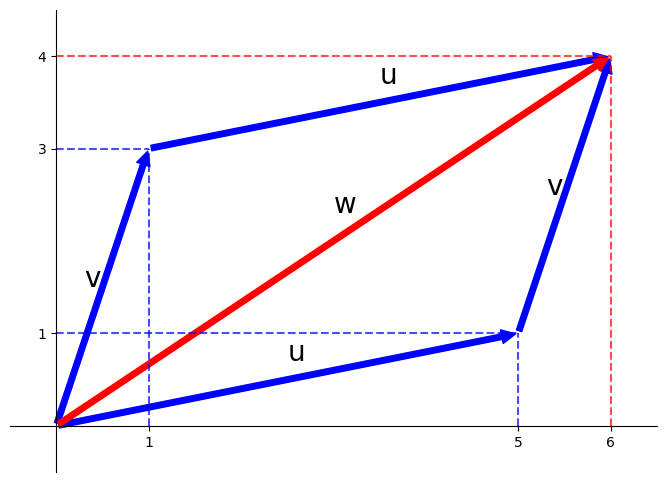

In [ ]:
import matplotlib.patches as mpatches

def main():
    fig, ax = plt.subplots(figsize=(6*1.61803398875,6))
    
    # vector u
    arrow_tail_0 = (0, 0)
    arrow_head_0 = (5, 1)
    arrow_0 = mpatches.FancyArrowPatch(arrow_tail_0, arrow_head_0, mutation_scale=20, color='b')
    ax.add_patch(arrow_0)
    
    # vector u (translated)
    arrow_tail_0t = (1, 3)
    arrow_head_0t = (6, 4)
    arrow_0t = mpatches.FancyArrowPatch(arrow_tail_0t, arrow_head_0t, mutation_scale=20, color='b')
    ax.add_patch(arrow_0t)
    
    # vector v
    arrow_tail_1 = (0, 0)
    arrow_head_1 = (1, 3)
    arrow_1 = mpatches.FancyArrowPatch(arrow_tail_1, arrow_head_1, mutation_scale=20, color='b')
    ax.add_patch(arrow_1)
    
    # vector v  (translated)
    arrow_tail_1t = (5, 1)
    arrow_head_1t = (6, 4)
    arrow_1t = mpatches.FancyArrowPatch(arrow_tail_1t, arrow_head_1t, mutation_scale=20, color='b')
    ax.add_patch(arrow_1t)
    
    # vector w
    arrow_tail_2 = (0, 0)
    arrow_head_2 = (6, 4)
    arrow_2 = mpatches.FancyArrowPatch(arrow_tail_2, arrow_head_2, mutation_scale=20, color='r')
    ax.add_patch(arrow_2)
    
    # text for u, v, w
    ax.text(arrow_head_0[0]/2      , arrow_head_0[1]/2 + 0.2, 'u', fontsize=20)
    ax.text(arrow_head_1[0]/2 - 0.2, arrow_head_1[1]/2      , 'v', fontsize=20)
    ax.text(arrow_head_0[0]/2 + 1  , arrow_head_0[1]/2 + 3.2, 'u', fontsize=20)
    ax.text(arrow_head_1[0]/2 + 4.8, arrow_head_1[1]/2 + 1.0, 'v', fontsize=20)
    ax.text(arrow_head_2[0]/2      , arrow_head_2[1]/2 + 0.3, 'w', fontsize=20)
    
    # helper line from arrow head of u, v, w to x or y axis
    for i, arrow_head in enumerate( (arrow_head_0, arrow_head_1, arrow_head_2) ):
        if i != 2:
            color = 'blue'
        else:
            color = 'red'
        ax.plot( (arrow_head[0], arrow_head[0]), (0, arrow_head[1]), linestyle='--', color=color, alpha=0.7 )
        ax.plot( (0, arrow_head[0]), (arrow_head[1], arrow_head[1]), linestyle='--', color=color, alpha=0.7 )
    
    ax.set_xlim(-0.5,6.5)
    ax.set_ylim(-0.5,4.5)
    
    ax.set_xticks( (1,5,6) )
    ax.set_yticks( (1,3,4) )
    
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position( "zero" )
    ax.spines['bottom'].set_position( "zero" )

    # Eliminate upper and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_aspect('equal')

    plt.show()
       
if __name__ == "__main__":
    main()

####***Section 2 Scalar Multiplication***

#####***Scalar Multiplication***

In [ ]:
def main():
    u = np.arange(0, 3)
    lam = 3.5
    print(f"{u       = }")
    print(f"{lam * u = }")
    
    
if __name__ == "__main__":
    main()

####***Section 3 Matrix Multiplication***

#####***Matrix Multiplication***

In [ ]:
def main():
    a = np.array([[1, 1], [2, 3]]) # (2,2)
    b = np.array([[1, 1], [2, 3]]) # (2,2)
    
    c1 = a @ b
    c2 = np.matmul(a, b)
    c3 = a.__matmul__(b)
    
    print("a @ b")
    print(f"{c1}", end="\n\n")
    
    print("np.matmul(a, b)")
    print(f"{c2}", end="\n\n")
    
    print("a.__matmul__(b)")
    print(f"{c3}", end="\n\n")

    
if __name__ == "__main__":
    main()

#####***Crazy Matrix Multiplication Speedup [eng](https://www.youtube.com/watch?v=wHb6fBXf3fQ&list=PLvcbYUQ5t0UGgWNa7lMUoZZO21HcjQipq&index=1)***

In [ ]:
import time


def main():
    n_cube_time = []
    n_square_time = []
    
    for n in range(100,5_000,100):
    
        A = np.random.normal(size=(n,n)) # (n,n)

        b = np.random.normal(size=(n,1)) # (n,1)
        c = np.random.normal(size=(n,1)) # (n,1)
        B = b @ c.T # (n,n)

        tic = time.time()
        C1 = A @ B # O(n^3)
        toc = time.time() 
        n_cube_time.append(toc-tic)

        tic = time.time()
        C2 = (A @ b) @ c.T # O(n^2)
        toc = time.time()
        n_square_time.append(toc-tic)
        
    fig, ax = plt.subplots(figsize=(4*1.61803398875,4))
    
    ax.set_title("Naive vs Smart Matrix Multiplication", fontsize=15)
    ax.plot( range(100,5_000,100), n_cube_time, label="Naive Matrix Multiplication")
    ax.plot( range(100,5_000,100), n_square_time, label="Smart Matrix Multiplication")
    
    ax.set_xlabel('n')
    ax.set_ylabel('Computing Time')
    ax.legend(fontsize=10)
    
    plt.show()

    
if __name__ == "__main__":
    main()

####***Section 4 Determinant and Condition Number***

#####***Determinant***

In [ ]:
def main():
    A = np.array([[1, 2], [3, 4]])
    print(np.linalg.det(A)) # determinant

if __name__ == "__main__":
    main()

#####***Condition Number***

In [ ]:
def main():
    A = np.array([[1, 2], [3, 4]])
    print(np.linalg.cond(A)) # condition number

if __name__ == "__main__":
    main()

####***Section 5 Inverse and Psudo Inverse***

#####***Inverse***

In [ ]:
def main():
    A = np.random.uniform(size=(2,2))
    A_inv = np.linalg.inv(A) # inverse
    
    print("A @ A_inv")
    print(A @ A_inv, end="\n\n")
    
    print("A_inv @ A")
    print(A_inv @ A)
    
    
if __name__ == "__main__":
    main()

#####***Psudo Inverse***

In [ ]:
def main():
    A = np.random.uniform(size=(2,2))
    A_pinv = np.linalg.pinv(A) # psudo-inverse
    
    print("A @ A_pinv")
    print(A @ A_pinv, end="\n\n")
    
    print("A_pinv @ A")
    print(A_pinv @ A)
    
    
if __name__ == "__main__":
    main()

####***Section 6 Transpose***

#####***Attribute - T***

In [ ]:
def main():
    a = np.array([[1,2],[3,4]])
    print(a.T) # transpose

if __name__ == "__main__":
    main()

#####***Function - np.transpose***

In [ ]:
def main():
    a = np.array([[1,2],[3,4]])
    print(np.transpose(a)) # transpose

if __name__ == "__main__":
    main()

####***Section 7 Trace***

#####***Function - np.trace***

In [ ]:
def main():
    a = np.array([[1,2],[3,4]])
    print(np.trace(a))

if __name__ == "__main__":
    main()

5


####***Section 8 Norm***

#####***Function - np.linalg.norm***

In [ ]:
def main():
    u = np.array([3.,4.])
    print(f"{np.linalg.norm(u) = }", end="\n\n")
    
    v = u / np.linalg.norm(u)
    print(f"{v[0]**2 + v[1]**2 = }")
    
    
if __name__ == "__main__":
    main()

5


####***Section 9 Inner Product***

#####***Inner Product***

$$\begin{array}{lll}
\displaystyle
\left[\begin{array}{lll}
1&2
\end{array}\right]
\left[\begin{array}{lll}
1\\
2
\end{array}\right]
=
\left[\begin{array}{lll}
5
\end{array}\right]
\end{array}$$

#####***Method - dot***

In [ ]:
def main():
    u = np.array([1,2]).reshape((1,-1))
    v = np.array([1,2]).reshape((-1,1))
    print(f"{(u@v)[0,0] = }", end="\n\n")
    
    u = np.array([1,2])
    v = np.array([1,2])
    print(f"{u.dot(v) = }")
    print(f"{np.dot(u, v) = }")
    print(f"{np.inner(u, v) = }")
    
    
if __name__ == "__main__":
    main()

#####***Function - np.dot***

In [ ]:
def main():
    u = np.array([1,2]).reshape((1,-1))
    v = np.array([1,2]).reshape((-1,1))
    print(f"{(u@v)[0,0] = }", end="\n\n")
    
    u = np.array([1,2])
    v = np.array([1,2])
    print(f"{u.dot(v) = }")
    print(f"{np.dot(u, v) = }")
    print(f"{np.inner(u, v) = }")
    
    
if __name__ == "__main__":
    main()

#####***Function - np.inner***

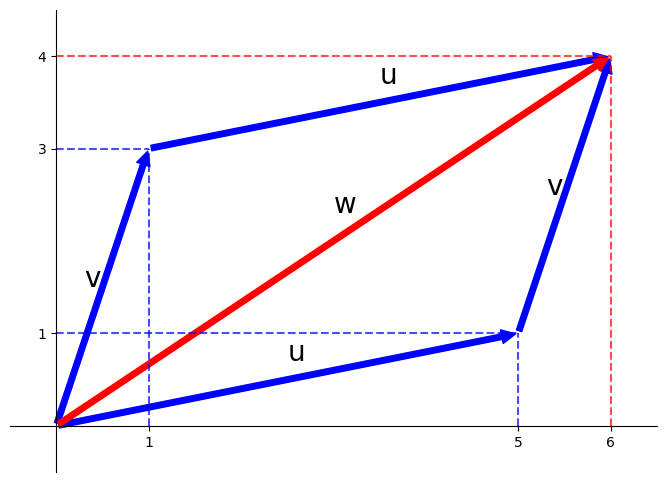

In [ ]:
def main():
    u = np.array([1,2]).reshape((1,-1))
    v = np.array([1,2]).reshape((-1,1))
    print(f"{(u@v)[0,0] = }", end="\n\n")
    
    u = np.array([1,2])
    v = np.array([1,2])
    print(f"{u.dot(v) = }")
    print(f"{np.dot(u, v) = }")
    print(f"{np.inner(u, v) = }")
    
    
if __name__ == "__main__":
    main()

####***Section 10 Outer Product***

#####***Outer Product***

$$\begin{array}{lll}
\displaystyle
\left[\begin{array}{lll}
1\\
2
\end{array}\right]
\left[\begin{array}{lll}
1&2&3
\end{array}\right]
=
\left[\begin{array}{lll}
1&2&3\\
2&4&6
\end{array}\right]
\end{array}$$

#####***Function - np.outer***

In [ ]:
def main():
    x = np.array([1,2]).reshape((-1,1))
    y = np.array([1,2,3]).reshape((1,-1))
    print("x @ y")
    print(f"{x @ y}", end="\n\n")
    
    x = np.array([1,2])
    y = np.array([1,2,3])
    print("np.outer(x,y)")
    print(f"{np.outer(x,y)}")
    
    
if __name__ == "__main__":
    main()

####***Section 11 Cross Product***

#####***Cross Product (Only in $R^3$)***

$$
{\bf u} \times {\bf v} = \left|
\begin{array}{lll}
{\bf i}&{\bf j}&{\bf k}\\
u_1&u_2&u_3\\
v_1&v_2&v_3\\
\end{array}\right|
$$

#####***Function - np.cross***

In [ ]:
def main():
    u = np.array([1,2,3])
    v = np.array([3,4,0])
    print(f"{u              = }")
    print(f"{v              = }")
    
    try:
        print(f"{u.cross(v) = }")
    except AttributeError as e:
        pass
    print(f"{np.cross(u, v) = }")
    
    
if __name__ == "__main__":
    main()

###***Chapter 10 Concatenation***

####***Section 1 Built-In Function - np.concatenate [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=33&t=1h59m14s)***

#####***Built-In Function - np.concatenate***

$$\begin{array}{llllllll}
\text{np.concatenate([a, b], axis=0)}&&\text{np.vstack([a, b])}&&\text{np.r_[a, b]}\\
\text{np.concatenate([a, b, c], axis=0)}&&\text{np.vstack([a, b, c])}&&\text{np.r_[a, b, c]}\\
\\
\text{np.concatenate([a, b], axis=1)}&&\text{np.hstack([a, b])}\\
\text{np.concatenate([a, b, c], axis=1)}&&\text{np.hstack([a, b, c])}\\
\\
\text{np.concatenate([a, b], axis=-1)}&&&&\text{np.c_[a, b]}\\
\text{np.concatenate([a, b, c], axis=-1)}&&&&\text{np.c_[a, b, c]}\\
\end{array}$$

#####***Function - np.concatenate with axis=0***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d = np.concatenate([a, b, c], axis=0)
    print(f"{d.shape = }")
    
    
if __name__ == "__main__":
    main()

d.shape = (6, 3, 4, 5)


#####***Function - np.concatenate with axis=1***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d = np.concatenate([a, b, c], axis=1)
    print(f"{d.shape = }")
    
    
if __name__ == "__main__":
    main()

d.shape = (2, 9, 4, 5)


#####***Function - np.concatenate with axis=-1***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d = np.concatenate([a, b, c], axis=-1)
    print(f"{d.shape = }")
    
    
if __name__ == "__main__":
    main()

d.shape = (2, 3, 4, 15)


#####***Function - np.concatenate with axis=None***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d = np.concatenate([a, b, c], axis=None)
    print(f"{d.shape = }")
    
    
if __name__ == "__main__":
    main()

####***Section 2 Built-In Function - np.vstack and np.hstack***

#####***Function - np.vstack***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d1 = np.concatenate([a, b, c], axis=0)
    print(f"{d1.shape = }")
    
    d2 = np.vstack([a, b, c])
    print(f"{d2.shape = }")
    
    
if __name__ == "__main__":
    main()

#####***Function - np.hstack***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d1 = np.concatenate([a, b, c], axis=1)
    print(f"{d1.shape = }")
    
    d2 = np.hstack([a, b, c])
    print(f"{d2.shape = }")
    
    
if __name__ == "__main__":
    main()

####***Section 3 Built-In Function - np.r_[] and np.c_[]***

#####***Function - np.r_[]***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d1 = np.concatenate([a, b, c], axis=0)
    print(f"{d1.shape = }")
    
    d2 = np.vstack([a, b, c])
    print(f"{d2.shape = }")
    
    d3 = np.r_[a, b, c]
    print(f"{d3.shape = }")
    
    
if __name__ == "__main__":
    main()

#####***Function - np.c_[]***

In [ ]:
def main():
    a = np.zeros((2, 3, 4, 5))
    b = np.zeros((2, 3, 4, 5))
    c = np.zeros((2, 3, 4, 5))

    d1 = np.concatenate([a, b, c], axis=-1)
    print(f"{d1.shape = }")
    
    d2 = np.c_[a, b, c]
    print(f"{d2.shape = }")
    
    
if __name__ == "__main__":
    main()

####***Section 14 One Hot Encoding***

#####***One Hot Encoding***

$$\begin{array}{llllllllllll}
0&\rightarrow&[&1&0&0&0&]\\
1&\rightarrow&[&0&1&0&0&]\\
2&\rightarrow&[&0&0&1&0&]\\
3&\rightarrow&[&0&0&0&1&]\\
\end{array}$$

In [ ]:
def main():
    print("np.eye(4)")
    print(f"{np.eye(4)}", end="\n\n")
    
    print("np.eye(4)[2]")
    print(f"{np.eye(4)[2]}", end="\n\n")
    
    try:
        print("np.eye(4)[0, 0, 3]")
        print(f"{np.eye(4)[0, 0, 3]}", end="\n\n")
    except IndexError as e:
        print(e, end="\n\n")
    
    print("np.eye(4)[[0, 0, 3]]")
    print(f"{np.eye(4)[[0, 0, 3]]}", end="\n\n")
    
    print("np.eye(4)[np.array([0, 0, 3])]")
    print(f"{np.eye(4)[np.array([0, 0, 3])]}", end="\n\n")

    
if __name__ == "__main__":
    main()

np.eye(4)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

np.eye(4)[2]
[0. 0. 1. 0.]

np.eye(4)[0, 0, 3]
too many indices for array: array is 2-dimensional, but 3 were indexed

np.eye(4)[[0, 0, 3]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

np.eye(4)[np.array([0, 0, 3])]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]



###***Chapter 11 Vectorization***

####***Section 1 Summation***

#####***Summation***

$$
\sum_{k=1}^n k^2
$$

#####***For Loop Computation***

In [ ]:
import time

def main():
    n = int(1e7)
    
    tic = time.time()
    s_n = 0
    for i in range(1, n+1):
        s_n += i**2
    toc = time.time()
    print(f"{s_n = }")
    print(f"For Loop Computing Time {toc-tic = }", end="\n\n")
       
if __name__ == "__main__":
    main()

#####***List Computation***

In [ ]:
import time

def main():
    n = int(1e7)
    
    tic = time.time()
    lst = []
    for i in range(1, n+1):
        lst.append(i**2)
    s_n = sum(lst)
    toc = time.time()
    print(f"{s_n = }")
    print(f"List Computing Time {toc-tic = }", end="\n\n")
       
if __name__ == "__main__":
    main()

#####***List Comprehension Computation***

In [ ]:
import time

def main():
    n = int(1e7)
    
    tic = time.time()
    s_n = sum( [ i**2 for i in range(1, n+1) ] )
    toc = time.time()
    print(f"{s_n = }")
    print(f"List Comprehension Computing Time {toc-tic = }", end="\n\n")
       
if __name__ == "__main__":
    main()

#####***Numpy Array Computation (Vectorization)***

In [ ]:
import time

def main():
    n = int(1e7)
    
    tic = time.time()
    x = np.arange(1, n+1)**2 # (n,)
    s_n = np.sum(x)
    toc = time.time()
    print(f"{s_n = }")
    print(f"Numpy Computing Time {toc-tic = }", end="\n\n")
       
if __name__ == "__main__":
    main()

#####***Formula Computation***

In [ ]:
import time

def main():
    n = int(1e7)
    
    tic = time.time()
    s_n = int( n * (n + 1) * ( 2*n + 1 ) / 6 )
    toc = time.time()
    print(f"{s_n = }")
    print(f"Formula Computing Time {toc-tic = }", end="\n\n")
       
if __name__ == "__main__":
    main()

####***Section 2 Numerical Integral***

#####***Numerical Integral***

$$\displaystyle\int_0^1 x^3 dx$$

In [ ]:
def f(x): 
    return x**3


def main():
    n_mesh = []
    integral_value = []
    for n in range(10,1_000,10):
        x = np.linspace(0,1,n+1)[:-1]
        dx = x[1] - x[0]
        y = f(x)
        numerical_integral_value = np.sum(y*dx)
        n_mesh.append(n)
        integral_value.append(numerical_integral_value)

    fig, ax = plt.subplots(figsize=(4*1.61803398875,4)) 
    
    ax.set_title('Numerical Integration of $\int_0^1 x^3 dx$', fontsize=15)
    ax.plot(n_mesh, integral_value, '-*') 
    ax.plot( (n_mesh[0], n_mesh[-1]), (0.25, 0.25), '--r')
    ax.set_xlabel('Number of Subintervals')
    ax.set_ylabel('Numerical Integration Value')

    plt.show()
      
if __name__ == "__main__":
    main()

####***Section 3 Coin Flip***

In [ ]:
def main():
    p = 0.1
    num_sample = 100

    uniform_sample = np.random.uniform(size=(num_sample,))

    coin_sample = np.zeros_like(uniform_sample)
    coin_sample[uniform_sample > 1-p] = 1.

    print(coin_sample)
      
    
if __name__ == "__main__":
    main()

####***Section 4 Loop Hoisting [eng](https://www.youtube.com/watch?v=uUnXJTgoQCg&list=PLvcbYUQ5t0UGgWNa7lMUoZZO21HcjQipq&index=3)***

#####***Naive Normalizarion***

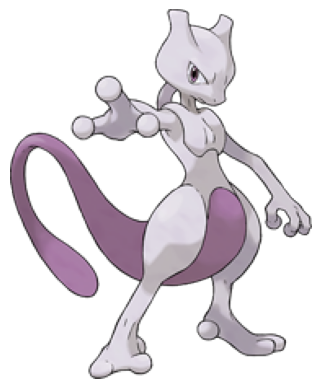

Naive Normalizarion Time :  8.084709167480469


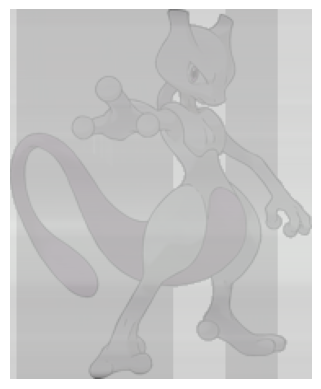

In [ ]:
import PIL
import time
import urllib

def imshow(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')
    plt.show()

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    imshow(img)

    ep = 1e-6
    
    img_copy = img.copy().astype(float)
    tic = time.time()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            row_mean = np.mean(img[i,:,:], axis=0) # not depends on j
            row_std = np.std(img[i,:,:], axis=0)   # not depends on j
            img_copy[i,j,:] = (img[i,j,:] - row_mean) / (row_std + ep) 
    toc = time.time()
    print('Naive Normalizarion Time : ', toc-tic)
    imshow(img_copy*0.09+0.43)
         
if __name__ == "__main__":
    main()

#####***Loop Hoisting***

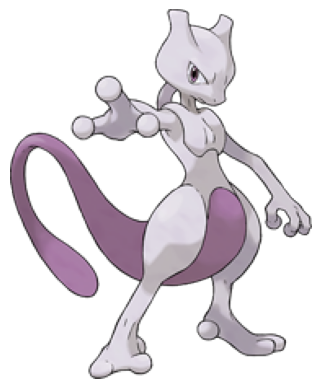

Loop Hoisting Time :  0.3647482395172119


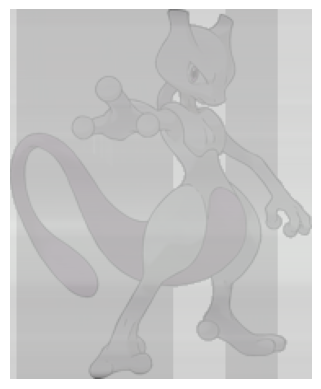

In [ ]:
import PIL
import time
import urllib

def imshow(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')
    plt.show()

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    imshow(img)

    ep = 1e-6
    
    img_copy = img.copy().astype(float)
    tic = time.time()
    for i in range(img.shape[0]):
        row_mean = np.mean(img[i,:,:], axis=0) # not depends on j <--- Loop Hoisting
        row_std = np.std(img[i,:,:], axis=0)   # not depends on j <--- Loop Hoisting
        for j in range(img.shape[1]):
            img_copy[i,j,:] = (img[i,j,:] - row_mean) / (row_std + ep) 
    toc = time.time()
    print('Loop Hoisting Time : ', toc-tic)
    imshow(img_copy*0.09+0.43)
        
if __name__ == "__main__":
    main()

#####***Full Vectorization***

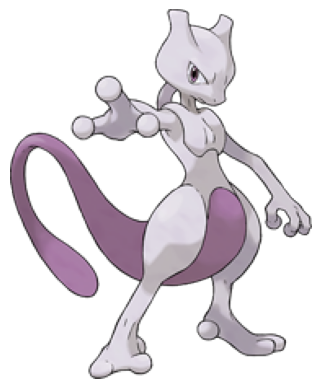

Full Vectorization Time :  0.011674642562866211


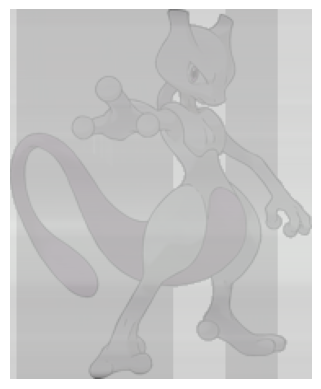

In [ ]:
import PIL
import time
import urllib

def imshow(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')
    plt.show()

def main():
    url = "https://upload.wikimedia.org/wikipedia/en/4/43/Pok%C3%A9mon_Mewtwo_art.png"
    img = np.array(PIL.Image.open(urllib.request.urlopen(url)))
    imshow(img)

    ep = 1e-6

    tic = time.time()
    mean = np.mean(img, axis=1, keepdims=True) # (406, 1, 3)
    std = np.std(img, axis=1, keepdims=True)   # (406, 1, 3)
    img_copy = (img - mean) / (std + ep)  
    toc = time.time()
    print('Full Vectorization Time : ', toc-tic)
    imshow(img_copy*0.09+0.43)
         
if __name__ == "__main__":
    main()

###***Chapter 12 View and Copy [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h13m41s)***

####***Section 1 View and Copy***




<img src="https://blog.paperspace.com/content/images/2020/08/image-7.png" width=50%>

Figure Sorce [Nuts and Bolts of NumPy Optimization Part 3: Understanding NumPy Internals, Strides, Reshape and Transpose](https://blog.paperspace.com/numpy-optimization-internals-strides-reshape-transpose/)

####***Section 2 View***

#####***View***

view : To have fast computation and efficient memory usage, almost all operations of numpy arrays return views rather than copies. You can assume this is numpy's default behavior.

#####***Slicing***

In [ ]:
def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    print(f"{x = }")

    y = x[1:4] # returns view
    y[0] = -1
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = array([ 0, -1,  2,  3,  4,  5,  6,  7,  8,  9])


#####***Method - reshape [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h38m43s)***

In [ ]:
def main():
    x = np.arange(6)
    print(f"{x = }")

    y = x.reshape( ( 3, 2 ) ) # returns view
    y[0,0] = 6
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([0, 1, 2, 3, 4, 5])
x = array([6, 1, 2, 3, 4, 5])


#####***Function - np.reshape***

In [ ]:
def main():
    x = np.arange(6)
    print(f"{x = }")

    y = np.reshape( x, ( 3, 2 ) ) # returns view
    y[0,0] = 6
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([0, 1, 2, 3, 4, 5])
x = array([6, 1, 2, 3, 4, 5])


#####***Attribute - T [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h45m8s)***

In [ ]:
def main():
    x = np.array([[1,2],[3,4]])
    print(f"{x = }")

    y = x.T # returns view
    y[0,0] = 6
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([[1, 2],
       [3, 4]])
x = array([[6, 2],
       [3, 4]])


#####***Function - np.transpose***

In [ ]:
def main():
    x = np.array([[1,2],[3,4]])
    print(f"{x = }")

    y = np.transpose(x) # returns view
    y[0,0] = 6
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([[1, 2],
       [3, 4]])
x = array([[6, 2],
       [3, 4]])


####***Section 3 Copy***

#####***Copy***

copy : If you want to have a copy rather than a view, explicitly say so by using np.copy or copy method.

#####***Method - copy***

In [ ]:
def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    print(f"{x = }")

    y  = x[1:4].copy() # returns copy
    y[0] = -1
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


#####***Function - np.copy***

In [ ]:
def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    print(f"{x = }")

    y = np.copy(x[1:4]) # returns copy
    y[0] = -1
    print(f"{x = }")

if __name__ == "__main__":
    main()

x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


####***Section 4 How to Change Shape - ravel (View) and flatten (Copy) [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=1h51m52s)***

#####***Method - ravel (View)***

In [ ]:
def main():
    x = np.arange(6).reshape( ( 3, 2 ) ) # (3,2)
    print(f"{x.shape = }")

    y = x.ravel() # (6,) # <--- view
    print(f"{y.shape = }")

if __name__ == "__main__":
    main()

x.shape = (3, 2)
y.shape = (6,)


#####***Method - flatten (Copy)***

In [ ]:
def main():
    x = np.arange(6).reshape( ( 3, 2 ) ) # (3,2)
    print(f"{x.shape = }")

    y = x.flatten() # (6,) # <--- copy
    print(f"{y.shape = }")

if __name__ == "__main__":
    main()

x.shape = (3, 2)
y.shape = (6,)


####***Section 5 No Aliasing due to Non-Contiguous Array [blog](https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays)***

#####***Populate Numpy Array***

```
x = np.arange(12)
```

<img src="https://i.stack.imgur.com/MXrA6.png">

In [ ]:
def main():
    x = np.arange(12)
    print(f"{id(x) = }")

if __name__ == "__main__":
    main()

id(x) = 139841165085648


#####***View - reshape Method***

```
y = x.reshape(3,4)
```

<img src="https://i.stack.imgur.com/BJIVL.png">

In memory, x and y are pointing the same contiguous memory block. They just view the data differently.

In [ ]:
def main():
    x = np.arange(12)
    print(f"{id(x) = }")

    y = x.reshape(3,4) # view
    print(f"{id(y) = }")

    y[-1,-1] = -11
    print(f"{x = }")

if __name__ == "__main__":
    main()

id(x) = 139841176574928
id(y) = 139841162947728
x = array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, -11])


#####***Still View - from C Contiguous to Fortran Contiguous Memory***

```
z = y.T
```

<img src="https://i.stack.imgur.com/g6Nb0.png">

In memory, z still is pointing the same contiguous memory block that x and y are pointing. They just interprete the data differently. x view this data as a numpy array of shape (12,), whereas y view as a numpy array of shape (3,4) and z view as a numpy array of shape (4,3). However, there is a fundamental difference between y and z view point. y view horizontally (C View), whereas z view vertically (Fortran View).



 

In [ ]:
def main():
    x = np.arange(12)
    print(f"{id(x) = }")

    y = x.reshape(3,4) # view
    print(f"{id(y) = }")

    z = y.T # view 
    print(f"{id(z) = }")

    z[-1,-1] = -11
    print(f"{x = }")

if __name__ == "__main__":
    main()

id(x) = 139841163108496
id(y) = 139841163108880
id(z) = 139841163109360
x = array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, -11])


#####***Copy - No Aliasing due to Non-Contiguous Array***

```
w = z.reshape((-1,))
```

w is storing as `np.array([0,4,8,1,5,9,2,6,10,3,7,11])` using a contiguous block of memory. So, w cannot recycle the old memory block that x, y, z are poining. So, w create a completely new memory block to store the data.

In [ ]:
def main():
    x = np.arange(12)
    print(f"{id(x) = }")

    y = x.reshape(3,4) # view 
    print(f"{id(y) = }")

    z = y.T # view 
    print(f"{id(z) = }")

    w = z.reshape((-1,)) # copy
    print(f"{id(w) = }")

    w[-1] = -11
    print(f"{x = }")
    print(f"{y = }")
    print(f"{z = }")
    print(f"{w = }")

if __name__ == "__main__":
    main()

id(x) = 139841163363024
id(y) = 139841163362928
id(z) = 139841163362832
id(w) = 139841163363120
x = array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
y = array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
z = array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])
w = array([  0,   4,   8,   1,   5,   9,   2,   6,  10,   3,   7, -11])


###***Chapter 13 Iteration over Numpy Array***

####***Section 1 For Loop [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=2h17m25s)***

#####***Iteration over 1D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2,3])

    for i in a:
        print(i)

if __name__ == "__main__":
    main()

1
2
3


#####***Iteration over 2D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2,3])
    a = np.array([a,a,a])

    for i in a:
        print(i)

if __name__ == "__main__":
    main()

[1 2 3]
[1 2 3]
[1 2 3]


#####***Iteration over 3D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2,3])
    a = np.array([a,a,a])
    a = np.array([a,a,a])

    for i in a:
        print(i)

if __name__ == "__main__":
    main()

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 2 3]
 [1 2 3]
 [1 2 3]]


####***Section 2 Nested For Loop [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=2h24m34s)***

#####***Iteration over 1D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])

    for i in a:
        print(i,end='\t')

if __name__ == "__main__":
    main()

1	2	

#####***Iteration over 2D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])
    a = np.array([a,a])

    for i in a:
        for j in i:
            print(j,end='\t')

if __name__ == "__main__":
    main()

1	2	1	2	

#####***Iteration over 3D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])
    a = np.array([a,a])
    a = np.array([a,a])

    for i in a:
        for j in i:
            for k in j:
                print(k,end='\t')

if __name__ == "__main__":
    main()

1	2	1	2	1	2	1	2	

####***Section 3 Built-In Function - nditer [eng](https://www.youtube.com/watch?v=RnQXXZHYBRQ&list=PLS1QulWo1RIaT4b78LVVUPkRzVa8OdODG&index=34&t=2h32m22s)***

#####***Iteration over 1D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])

    for i in np.nditer(a):
        print(i,end='\t')

if __name__ == "__main__":
    main()

1	2	

#####***Iteration over 2D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])
    a = np.array([a,a])

    for i in np.nditer(a):
        print(i,end='\t')

if __name__ == "__main__":
    main()

1	2	1	2	

#####***Iteration over 3D Numpy Array***

In [ ]:
def main():
    a = np.array([1,2])
    a = np.array([a,a])
    a = np.array([a,a])

    for i in np.nditer(a):
        print(i,end='\t')

if __name__ == "__main__":
    main()

1	2	1	2	1	2	1	2	

###***Chapter 14 How to make Mesh Grid***

####***Section 1 Function - np.meshgrid***

#####***Function - np.meshgrid***

In [ ]:
def main():
    x = np.linspace(0, 2, 3)
    y = np.linspace(0, 3, 4)
    print(f"{x = }", end='\n\n')
    print(f"{y = }", end='\n\n')
    
    X, Y = np.meshgrid(x, y) 
    print("X : ")
    print(X, end='\n\n')
    print("Y : ")
    print(Y)

    
if __name__ == "__main__":
    main()

x = array([0., 1., 2.])

y = array([0., 1., 2., 3.])

X : 
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]

Y : 
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


#####***Function of Mesh Grid X and Y***

In [ ]:
def f(X, Y):
    return X**2 + Y**2 

def main():
    x = np.linspace(0, 2, 3)
    y = np.linspace(0, 3, 4)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    print("X : ")
    print(X, end='\n\n')
    print("Y : ")
    print(Y, end='\n\n')
    print("Z : ")
    print(Z)
    
if __name__ == "__main__":
    main()

X : 
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]

Y : 
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]

Z : 
[[ 0.  1.  4.]
 [ 1.  2.  5.]
 [ 4.  5.  8.]
 [ 9. 10. 13.]]


#####***Plot of 2D Norm PDF***

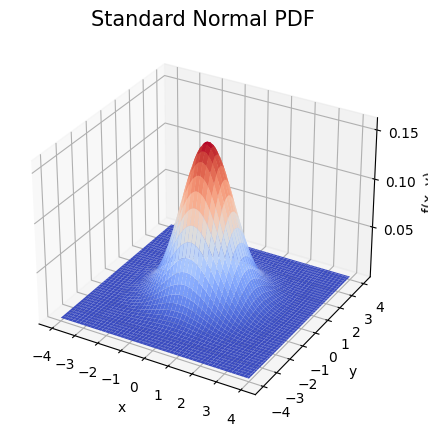

In [ ]:
def f(X, Y):
    return np.exp( - X**2 / 2 - Y**2 / 2 ) / ( 2 * np.pi ) 


def main():
    x = np.linspace(-4,4,100)
    y = np.linspace(-4,4,100)
    
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y) 
    
    fig, ax = plt.subplots(1, 1, figsize=(5*1.61803398875,5), subplot_kw={'projection': '3d'})
    
    ax.set_title("Standard Normal PDF", fontsize=15)
    ax.plot_surface(X, Y, Z, 
                    rstride=2, 
                    cstride=2, 
                    cmap=plt.cm.coolwarm, 
                    linewidth=0.5, 
                    antialiased=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_zticks( (0.05, 0.10, 0.15) )

    plt.show()
    
if __name__ == "__main__":
    main()

####***Section 2 Function - np.mgrid [doc](https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)***

In [ ]:
def main():
    x = np.linspace(0, 2, 3)
    y = np.linspace(0, 3, 4)    
    X, Y = np.meshgrid(x, y) 
    print("X : ")
    print(X, end='\n\n')
    print("Y : ")
    print(Y)
   
if __name__ == "__main__":
    main()

X : 
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]

Y : 
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [ ]:
def main():
    x_min, x_max = 0, 2
    y_min, y_max = 0, 3
    X, Y = np.mgrid[ x_min : x_max : 3j, y_min : y_max : 4j ] 
    print("X : ")
    print(X, end='\n\n')
    print("Y : ")
    print(Y)
   
if __name__ == "__main__":
    main()

X : 
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]]

Y : 
[[0. 1. 2. 3.]
 [0. 1. 2. 3.]
 [0. 1. 2. 3.]]


If the step length is a complex number (e.g. 5j), then the integer part of its magnitude is interpreted as specifying the number of points to create between the start and stop values, where the stop value is inclusive.

[doc](https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html)

###***Chapter 15 How to solve a system of linear equations [eng](https://www.youtube.com/watch?v=hxuYzgwuthg&t=892s)***

####***Section 1 Solution of Linear System***

<img src="https://miro.medium.com/max/1400/1*GEvvcnEHR-S604ZxvzkD_Q.png">

Image Sorce [How do you use NumPy, SciPy and SymPy to solve Systems of Linear Equations?](https://towardsdatascience.com/how-do-you-use-numpy-scipy-and-sympy-to-solve-systems-of-linear-equations-9afed2c388af)

####***Section 2 Unique Solution***



$$
\displaystyle
\left[\begin{array}{rr}
1&2\\
3&4
\end{array}\right]
{\bf x}
=
\left[\begin{array}{r}
5\\
11
\end{array}\right]
\quad\quad\text{or}\quad\quad
\left\{\begin{array}{rrrrr}
x&+&2y&=&5\\
3x&+&4y&=&11
\end{array}\right.
$$

In [ ]:
def main():
    A = np.array([[1,2],[3,4]])
    b = np.array([[5],[11]])

    # not recomended - A must be invertible
    solution = np.linalg.inv(A) @ b
    print(solution,end="\n\n")

    # not recomended - A must be invertible  
    solution = np.linalg.solve(A, b)
    print(solution,end="\n\n")

    # recomended 
    solution, *_ = np.linalg.lstsq(A, b, rcond=None)
    print(solution,end="\n\n")

if __name__ == "__main__":
    main()

[[1.]
 [2.]]
[[1.]
 [2.]]
[[1.]
 [2.]]


####***Section 3 Many Solution***



$$
\displaystyle
\left[\begin{array}{rr}
1&2\\
1&2
\end{array}\right]
{\bf x}
=
\left[\begin{array}{r}
5\\
5
\end{array}\right]
\quad\quad\text{or}\quad\quad
\left\{\begin{array}{rrrrr}
x&+&2y&=&5\\
x&+&2y&=&5
\end{array}\right.
$$

In [ ]:
def main():
    A = np.array([[1,2],[1,2]])
    b = np.array([[5],[5]])

    # not recomended - A must be invertible
    # solution = np.linalg.inv(A) @ b 
    # print(solution,end="\n\n")

    # not recomended - A must be invertible 
    # solution = np.linalg.solve(A, b) 
    # print(solution,end="\n\n")

    # recomended 
    solution, *_ = np.linalg.lstsq(A, b, rcond=None)
    print(solution,end="\n\n")

if __name__ == "__main__":
    main()

[[1.]
 [2.]]


####***Section 4 No Solution***



$$
\displaystyle
\left[\begin{array}{rr}
1&2\\
2&4
\end{array}\right]
{\bf x}
=
\left[\begin{array}{r}
5\\
11
\end{array}\right]
\quad\quad\text{or}\quad\quad
\left\{\begin{array}{rrrrr}
x&+&2y&=&5\\
2x&+&4y&=&11
\end{array}\right.
$$

In [ ]:
def main():
    A = np.array([[1,2],[2,4]])
    b = np.array([[5],[11]])

    # not recomended - A must be invertible
    # solution = np.linalg.inv(A) @ b 
    # print(solution,end="\n\n")

    # not recomended - A must be invertible 
    # solution = np.linalg.solve(A, b) 
    # print(solution,end="\n\n")

    # recomended 
    solution, *_ = np.linalg.lstsq(A, b, rcond=None)
    print(solution,end="\n\n")

if __name__ == "__main__":
    main()

[[1.08]
 [2.16]]




$$
\displaystyle
\left[\begin{array}{rr}
1&2\\
3&4\\
4&6
\end{array}\right]
{\bf x}
=
\left[\begin{array}{r}
5\\
11\\
15
\end{array}\right]
\quad\quad\text{or}\quad\quad
\left\{\begin{array}{rrrrr}
x&+&2y&=&5\\
3x&+&4y&=&11\\
4x&+&6y&=&15
\end{array}\right.
$$

In [ ]:
def main():
    A = np.array([[1,2],[3,4],[4,6]])
    b = np.array([[5],[11],[15]])

    # not recomended - A must be invertible
    # solution = np.linalg.inv(A) @ b 
    # print(solution,end="\n\n")

    # not recomended - A must be invertible 
    # solution = np.linalg.solve(A, b) 
    # print(solution,end="\n\n")

    # recomended 
    solution, *_ = np.linalg.lstsq(A, b, rcond=None)
    print(solution,end="\n\n")

if __name__ == "__main__":
    main()

[[1.33333333]
 [1.66666667]]
